In [11]:
import os
import numpy
from matplotlib import pyplot
from numpy.random import default_rng
from scipy.stats import wasserstein_distance
import matplotlib
import matplotlib.pyplot as plt
import Bio
import Bio.SeqRecord
import Bio.SeqIO
import pygtrie
import re
from IPython.core.display import display, HTML


def get_subfragment_indices_by_length(fragment, subfragment_min_length):
    while True:
        fragment_indices_count = fragment.shape[0]
        start_index = numpy.random.randint(fragment_indices_count)
        for end_index in range(start_index, fragment_indices_count):
            if fragment[end_index] - fragment[start_index] > subfragment_min_length:
                indices = numpy.array(list(range(start_index, end_index+1)))
                return indices


def get_subfragment_indices_by_count(fragment, subfragment_indices_count):
    while True:
        fragment_indices_count = fragment.shape[0]
        start_index = numpy.random.randint(fragment_indices_count)
        end_index = start_index + subfragment_indices_count + 1
        if end_index < fragment_indices_count:
            indices = numpy.array(list(range(start_index, end_index + 1)))
            return indices


def match_fragments(full_fragment, partial_fragment):
    normalized_partial_fragment = partial_fragment - partial_fragment[0]
    full_fragment_length = numpy.max(full_fragment)
    partial_fragment_length = numpy.max(normalized_partial_fragment)
    start_pos = 0
    end_pos = partial_fragment_length
    delta = 0.00001
    max_dist = numpy.inf
    matched_indices = None
    x = []
    y = []
    while end_pos < 1:
        # indices = numpy.where(numpy.any((full_fragment > start_pos) and (full_fragment < end_pos)))
        # indices = numpy.where(numpy.any(full_fragment > start_pos))
        index_predicates = (full_fragment > start_pos) & (full_fragment < end_pos)
        indices = numpy.where(index_predicates)[0]
        indices.sort()

        current_fragment = full_fragment[indices]
        current_fragment = current_fragment - current_fragment[0]

        dist = wasserstein_distance(current_fragment, normalized_partial_fragment)
        x.append(start_pos)
        y.append(dist)
        if dist < max_dist:
            max_dist = dist
            matched_indices = indices

        end_pos = end_pos + delta
        start_pos = start_pos + delta

    return matched_indices, numpy.array(x), numpy.array(y)


def dye_chromosome(chromosome: Bio.SeqRecord.SeqRecord, fluorochrome: str):
    chromosome = chromosome.lower()
    fluorochrome = fluorochrome.lower()
    chromosome_str = str(chromosome.seq)
    indices = [m.start() for m in re.finditer(fluorochrome, chromosome_str)]
    fragment = numpy.array(indices).astype(float) / float(len(chromosome_str))
    return indices, fragment


def plot_fragment(fragment, color, markersize=4):
    y = numpy.zeros_like(fragment)
    x = fragment
    plt.plot(x, y, 'o', markersize=markersize, markerfacecolor=color, markeredgecolor=color)


def plot_fragments(full_fragment, partial_fragment, sampled_partial_fragment, transformed_sampled_partial_fragment, transformed_noised_sampled_partial_fragment, matched_fragment, x_dist, y_dist):
    figsize=(60, 5)
    plt.figure(figsize=figsize)
    plot_fragment(fragment=full_fragment, color='blue')
    plot_fragment(fragment=partial_fragment, color='red')
    plt.xlim(0, 1)
    plt.show()

    # y3 = numpy.zeros_like(sampled_partial_fragment)
    # x3 = sampled_partial_fragment
    # plt.plot(x3, y3, 'o', markersize=2, markerfacecolor='green', markeredgecolor='green')


    plt.figure(figsize=figsize)
    plot_fragment(fragment=sampled_partial_fragment, color='green')
    plt.xlim(0, 1)
    plt.show()

    plt.figure(figsize=figsize)
    plot_fragment(fragment=transformed_sampled_partial_fragment, color='magenta')
    plt.xlim(0, 1)
    plt.show()

    plt.figure(figsize=figsize)
    plot_fragment(fragment=transformed_noised_sampled_partial_fragment, color='orange')
    plt.xlim(0, 1)
    plt.show()

    plt.figure(figsize=figsize)
    plot_fragment(fragment=matched_fragment, color='purple')
    plt.xlim(0, 1)
    plt.show()

    plt.figure(figsize=figsize)
    plt.plot(x_dist, y_dist, '-', markersize=2)
    plt.xlim(0, 1)
    plt.show()

C:\Users\Roy\AppData\Local\Temp\ipykernel_3280\407153132.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


chromosome4_segment length: 476808


noise: [ 1.33153764e-03  4.94767446e-04 -4.55308405e-05 -7.97030370e-04
 -8.06297915e-04 -2.32643161e-04  2.13667061e-03  7.22747827e-04
 -1.09748167e-03 -6.95656831e-04]
noise (bases): [ 634.88779685  235.90907636  -21.70946902 -380.03045653 -384.44929631
 -110.9261201  1018.78163797  344.61194608 -523.28804067 -331.69474207]
full fragment length: 134
partial fragment length: 10
matched indices: [73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]
partial fragment indices: [73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]
matching_ratio: 1.0


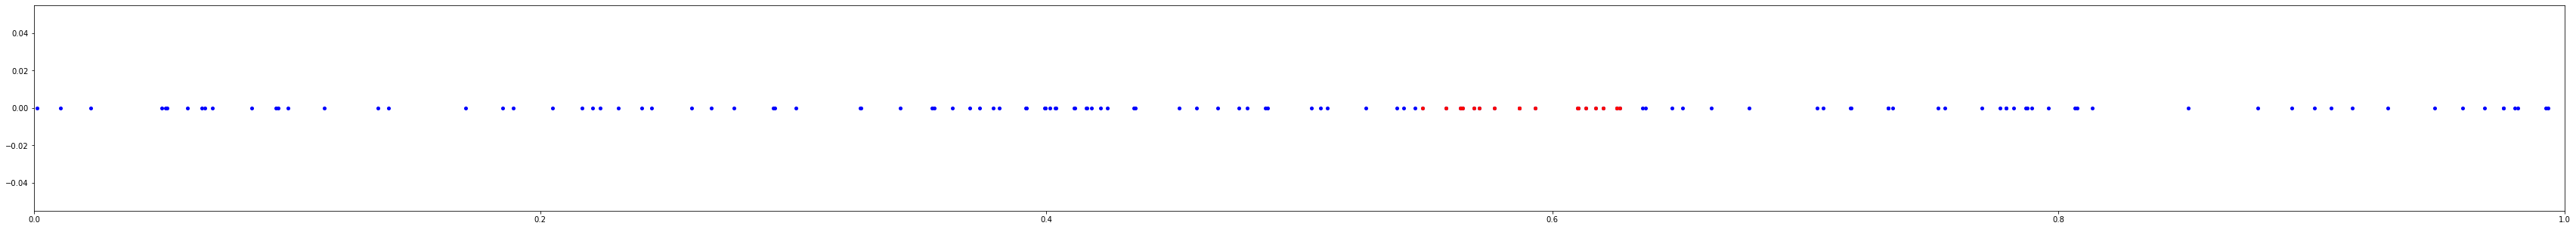

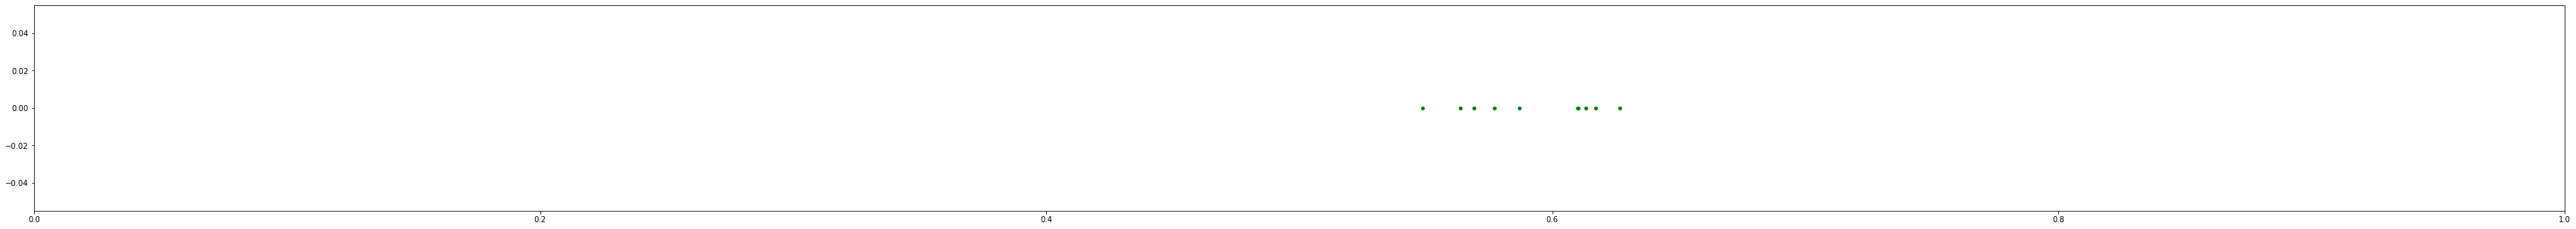

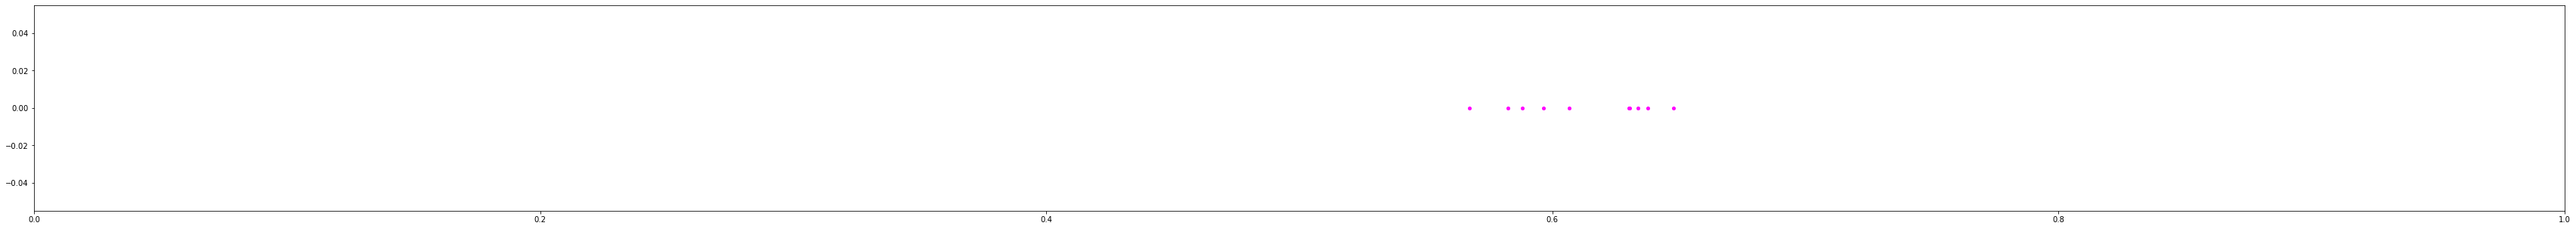

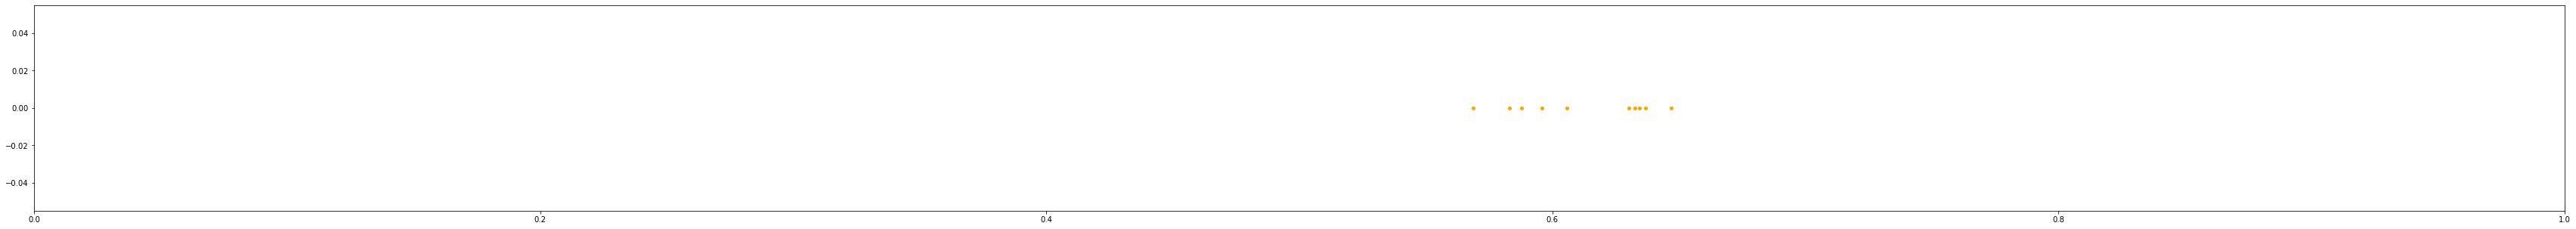

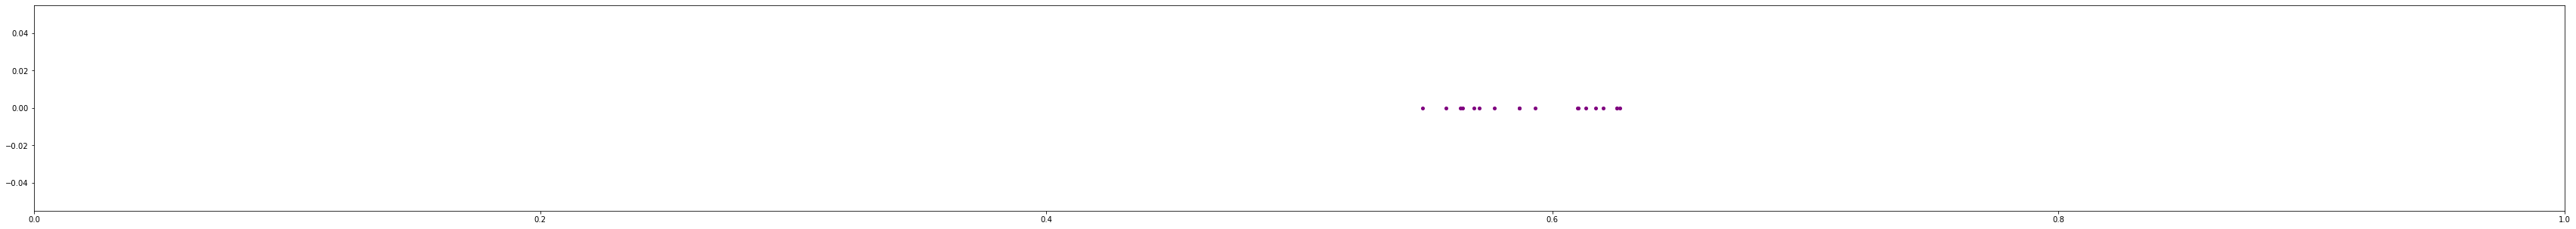

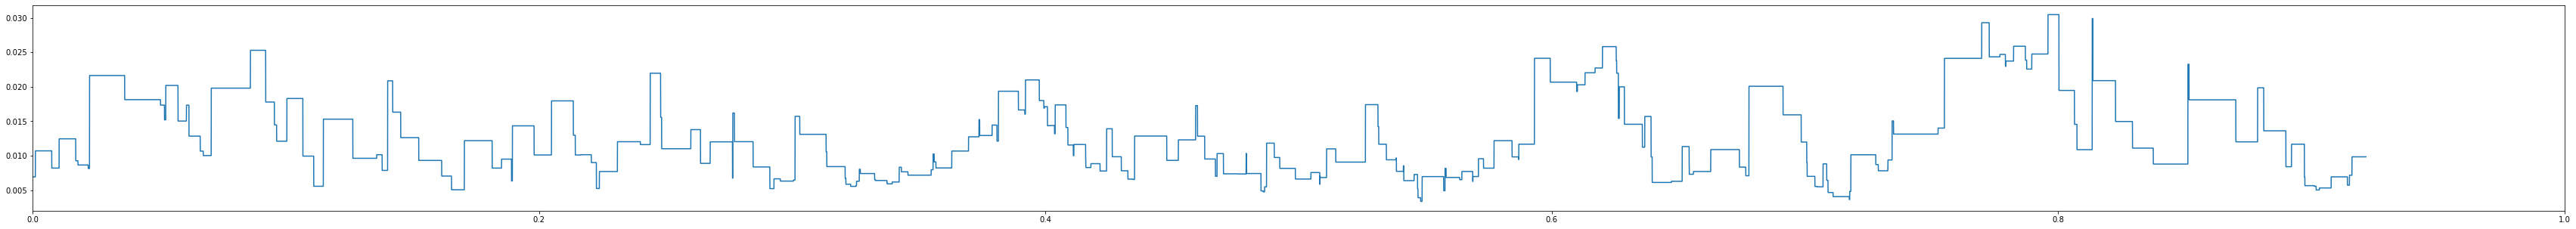

noise: [-2.83458280e-04  2.64053785e-04 -4.23535297e-04  8.43457232e-04
 -4.56813525e-04 -8.90902790e-06  2.62791990e-03  5.94520095e-04
  2.19331168e-03 -8.25491882e-04]
noise (bases): [-135.15517572  125.9029569  -201.94501774  402.16715565 -217.81234326
   -4.24789578 1253.01323117  283.4719376  1045.78855441 -393.60113322]
full fragment length: 134
partial fragment length: 10
matched indices: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
partial fragment indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
matching_ratio: 0.9444444444444444


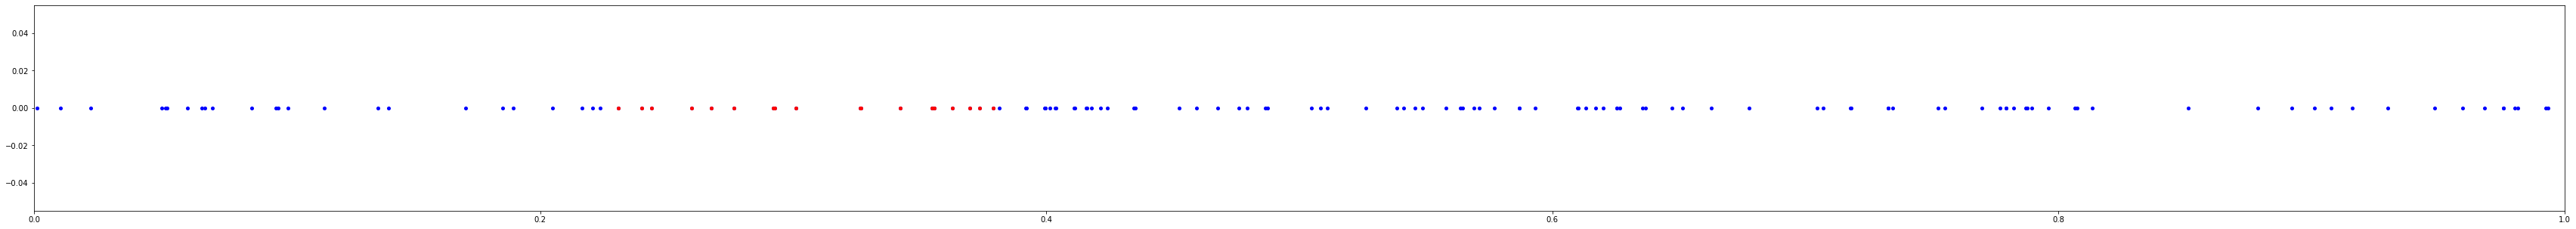

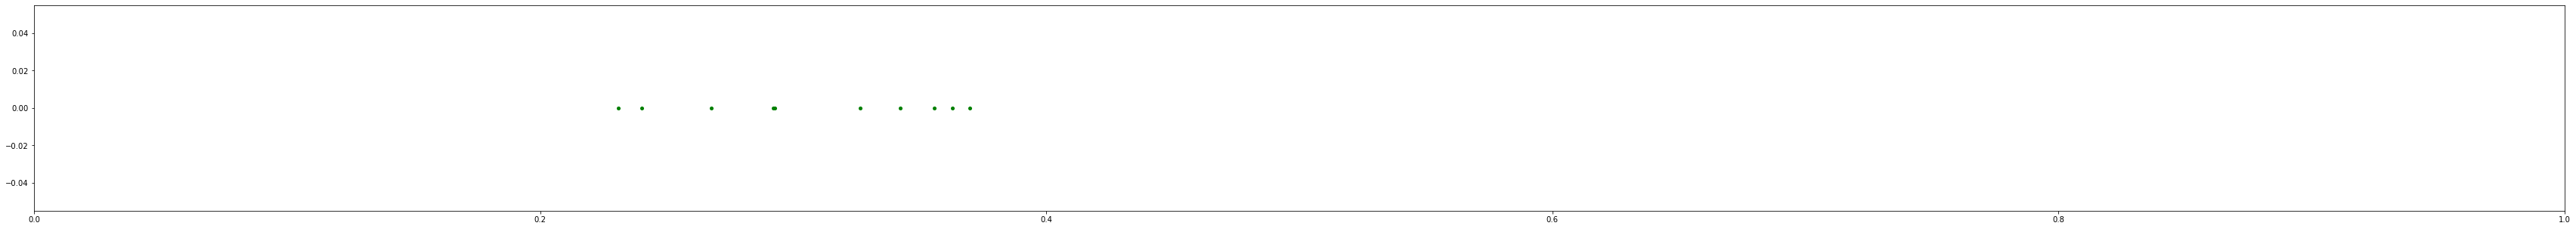

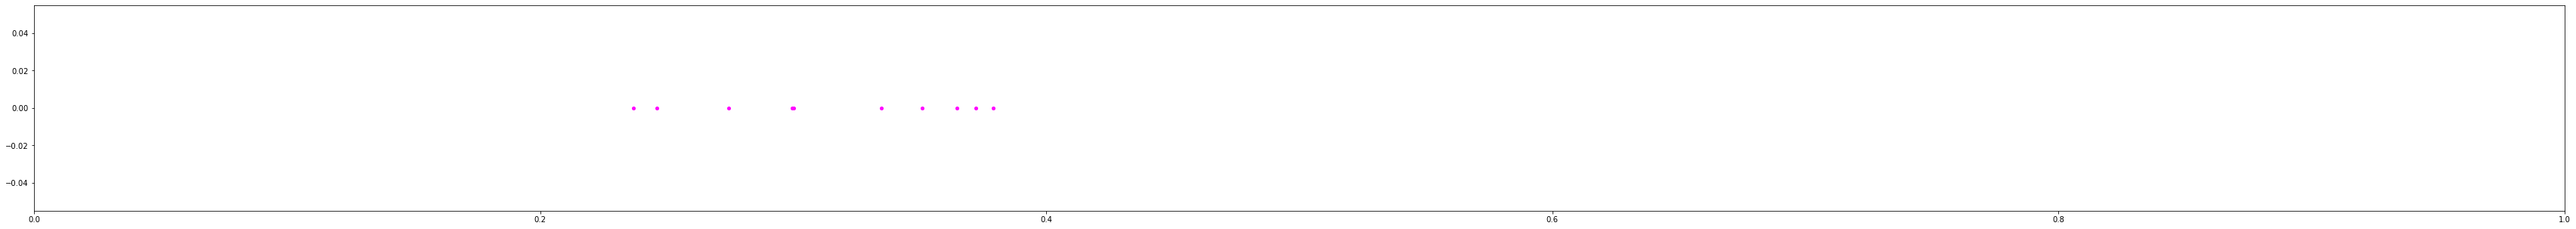

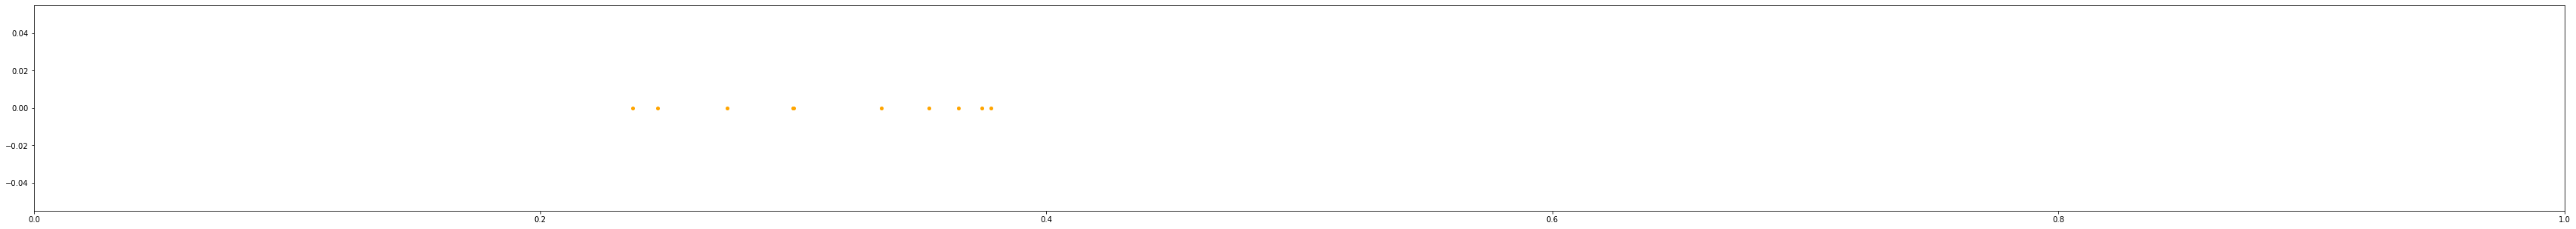

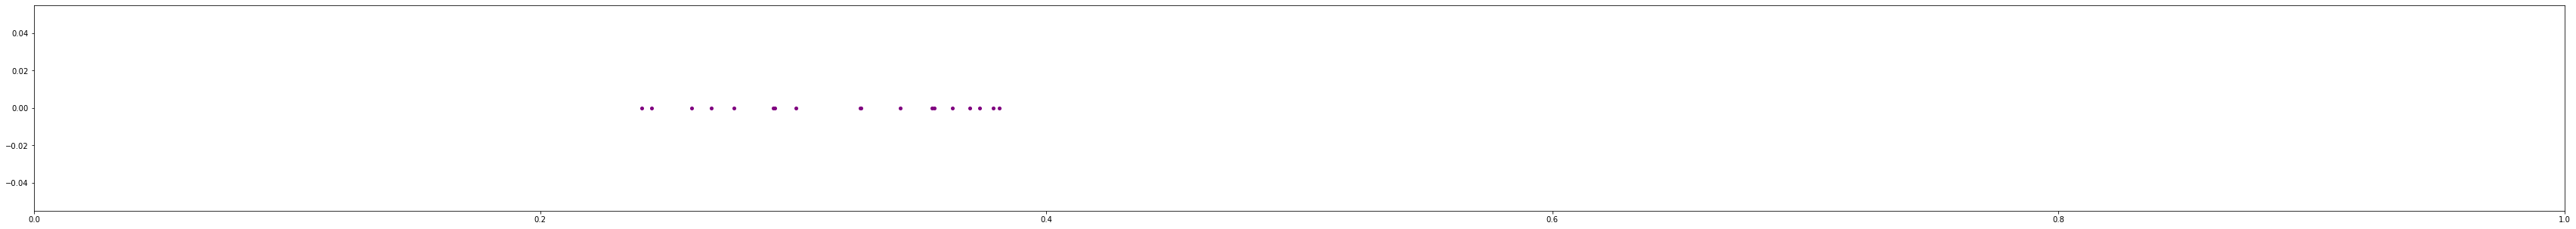

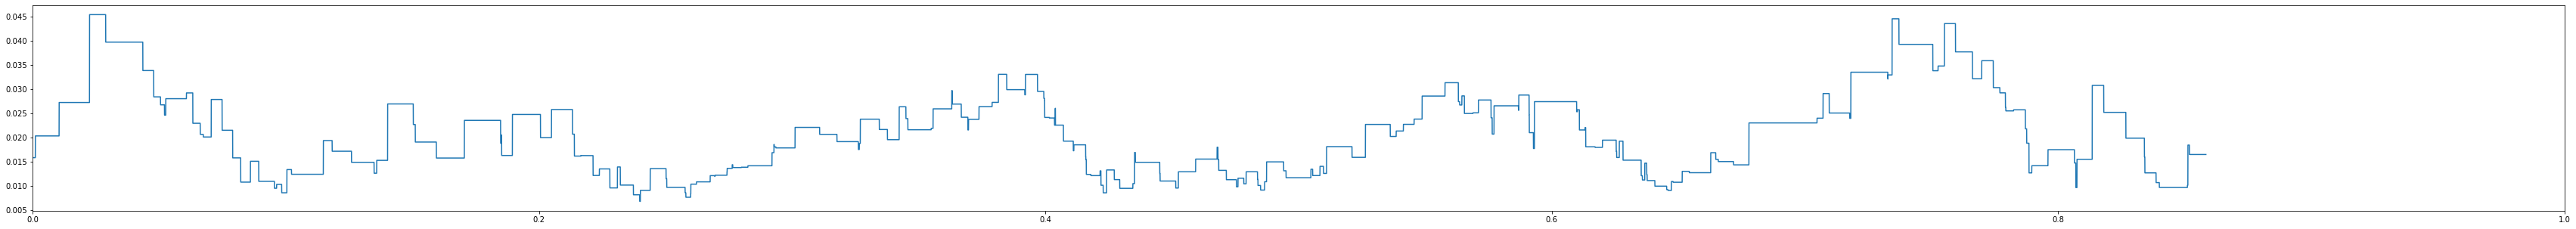

noise: [ 0.00058777 -0.00024738  0.00123246  0.00024137  0.00148949  0.00246953
 -0.00028458  0.00125917 -0.00126826 -0.00054178]
noise (bases): [ 280.25244892 -117.95458158  587.64448686  115.08675688  710.20010432
 1177.49280299 -135.69094849  600.3819746  -604.7141692  -258.32373849]
full fragment length: 134
partial fragment length: 10
matched indices: [20 21 22 23 24 25 26 27 28 29]
partial fragment indices: [69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]
matching_ratio: 0.0


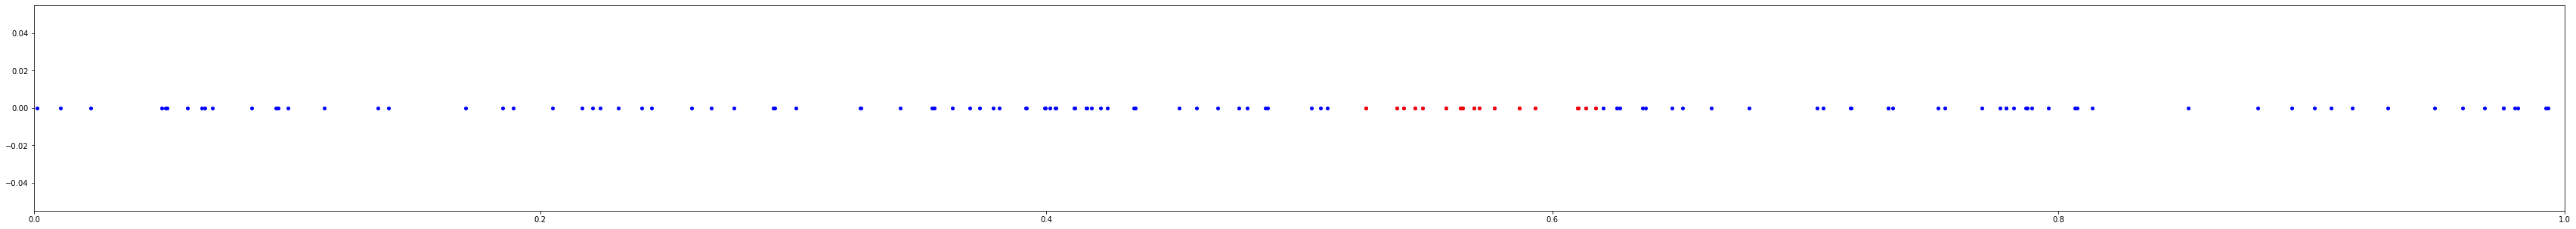

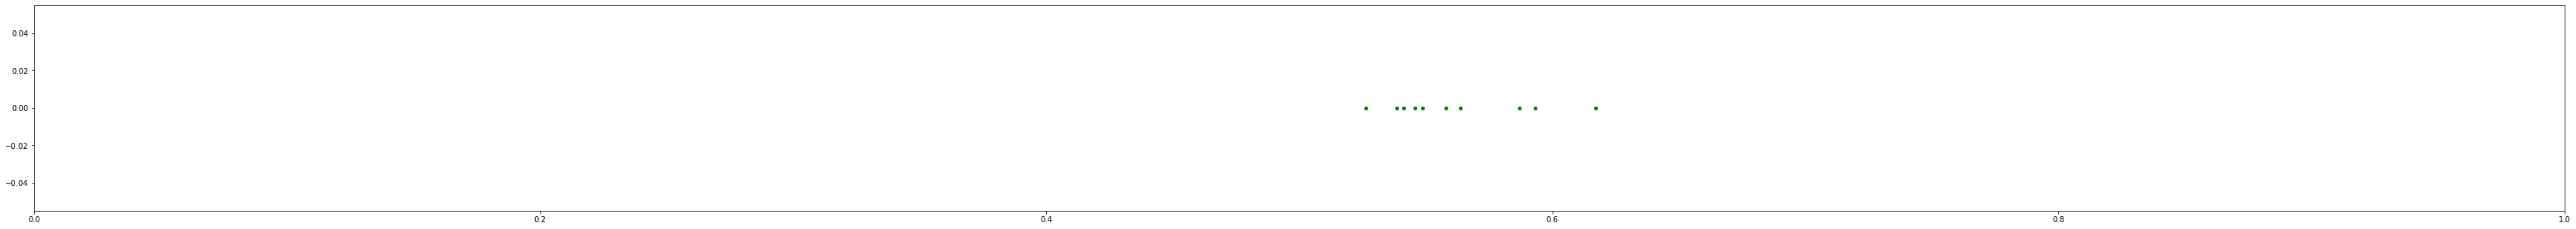

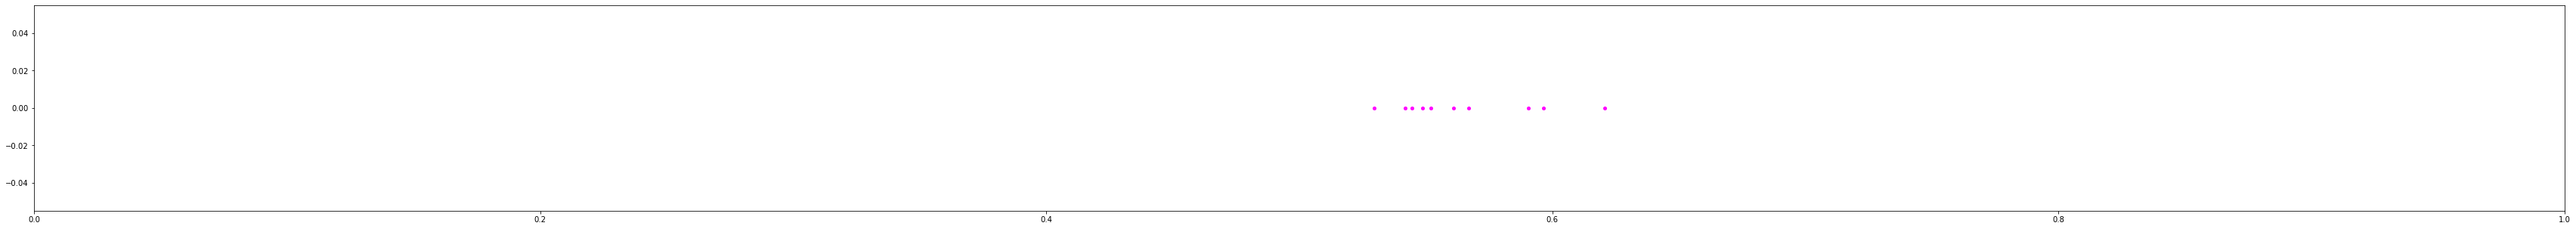

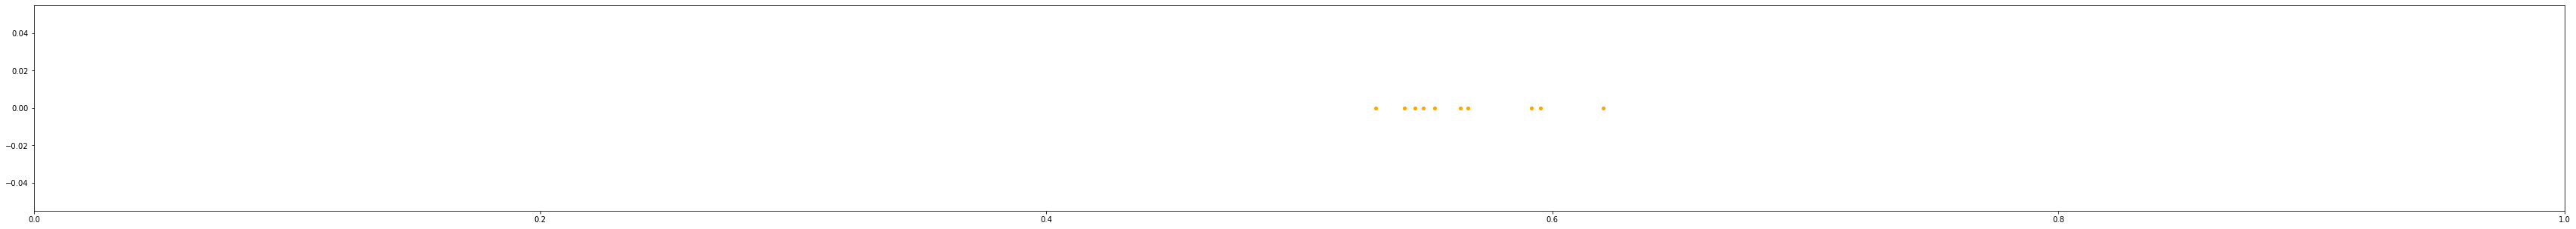

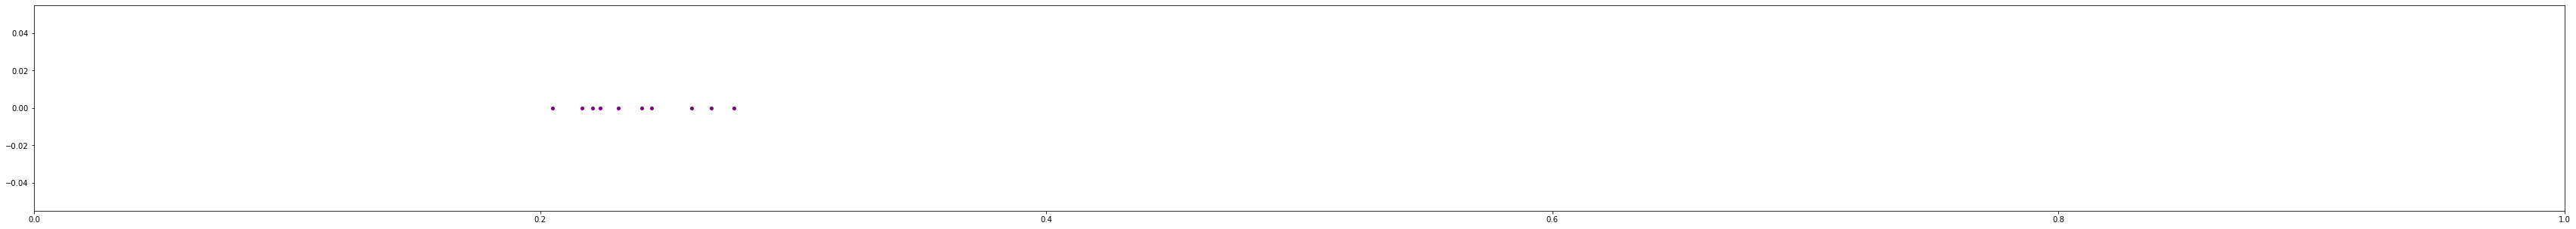

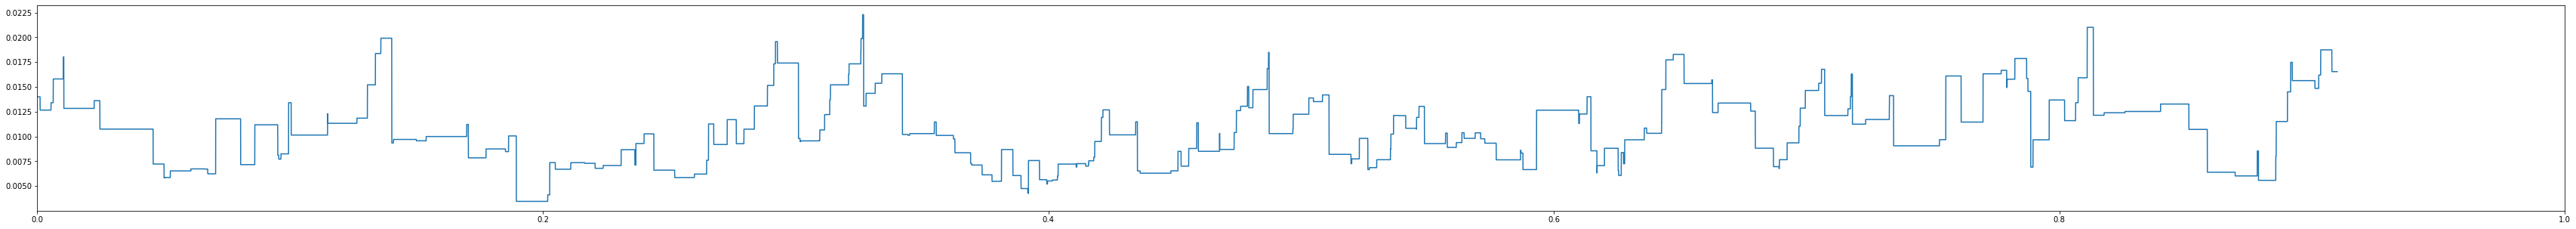

noise: [ 0.00066124 -0.00064571  0.00069167  0.00054371 -0.00250529 -0.00235218
 -0.00033337 -0.00077026 -0.0012053   0.00073455]
noise (bases): [  315.28441519  -307.8786817    329.79297544   259.24512759
 -1194.54057381 -1121.53807377  -158.95370681  -367.26486299
  -574.69854069   350.23886764]
full fragment length: 134
partial fragment length: 10
matched indices: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]
partial fragment indices: [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110]
matching_ratio: 0.0


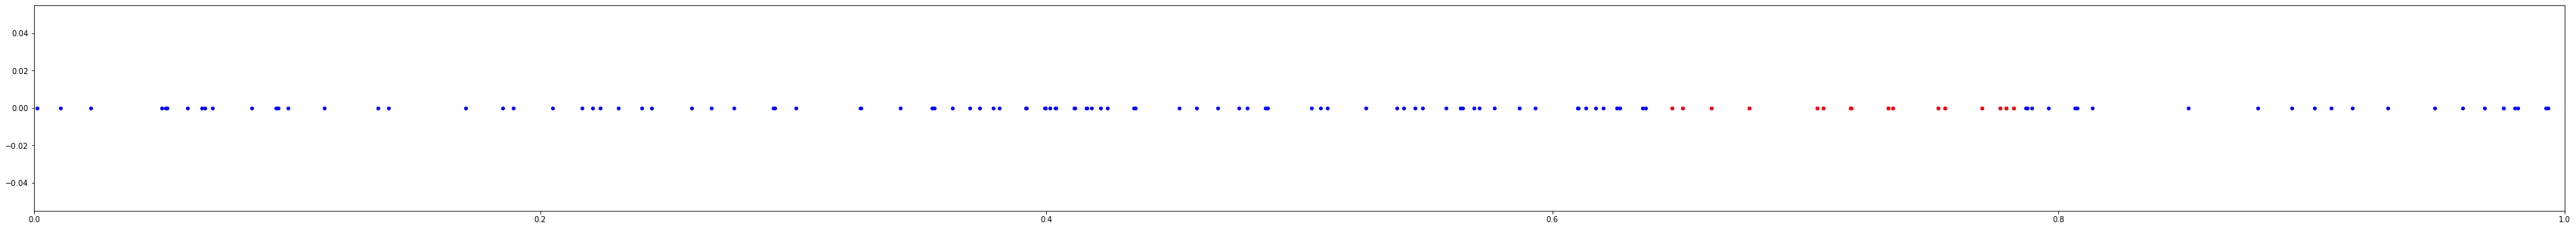

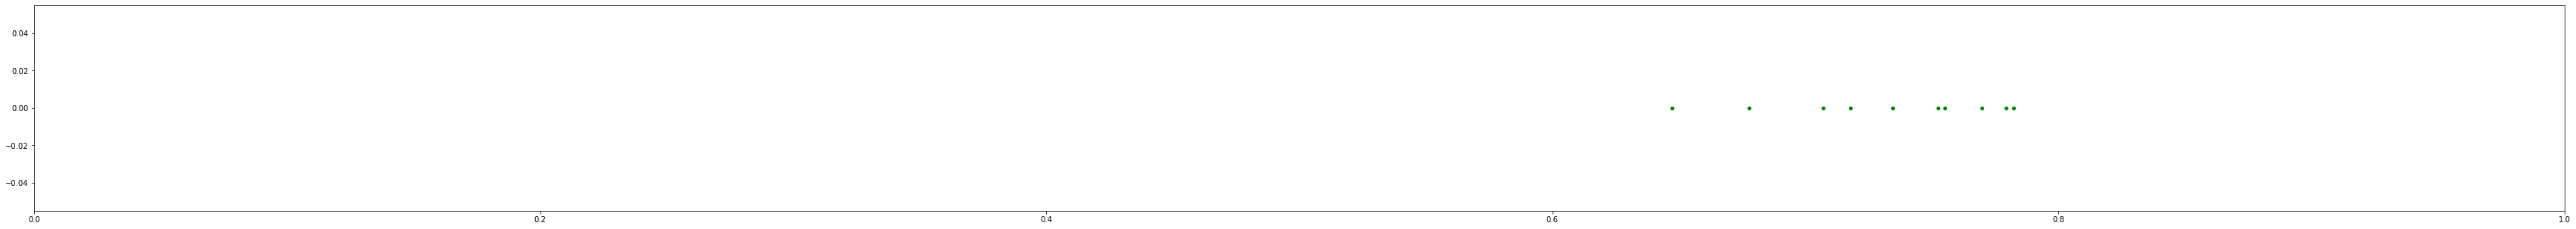

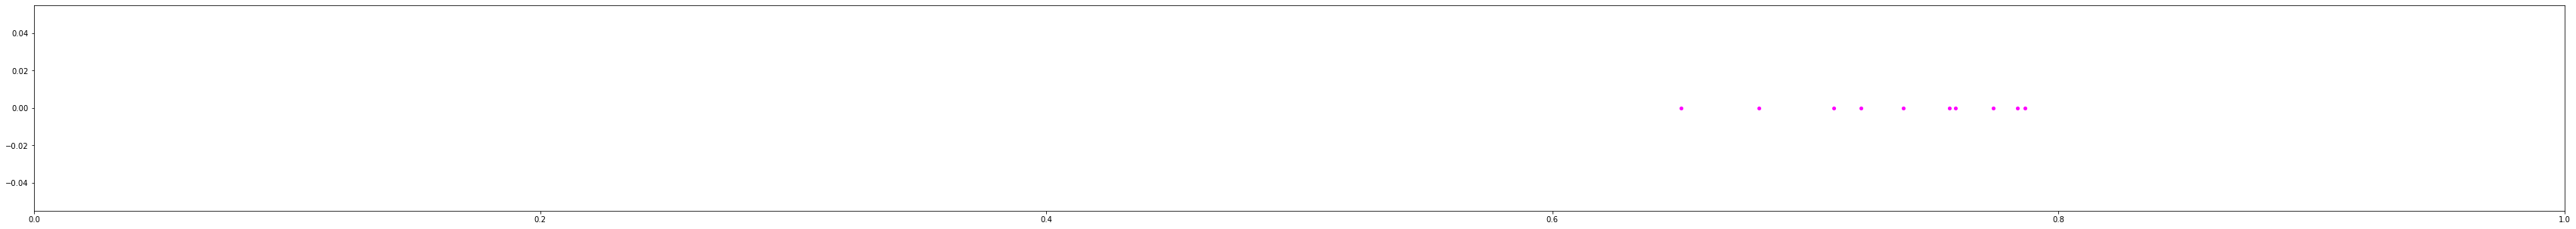

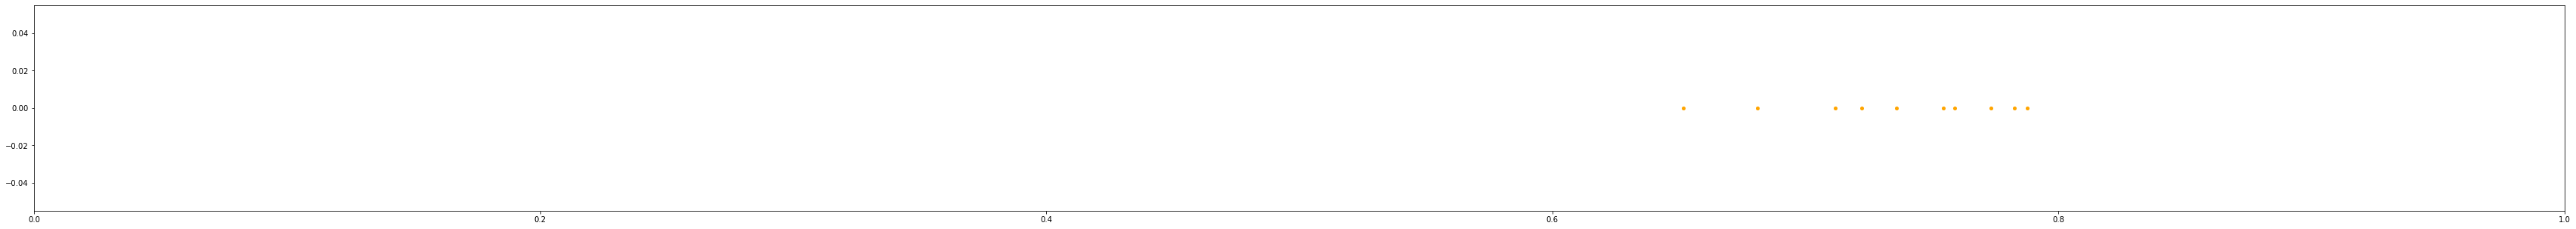

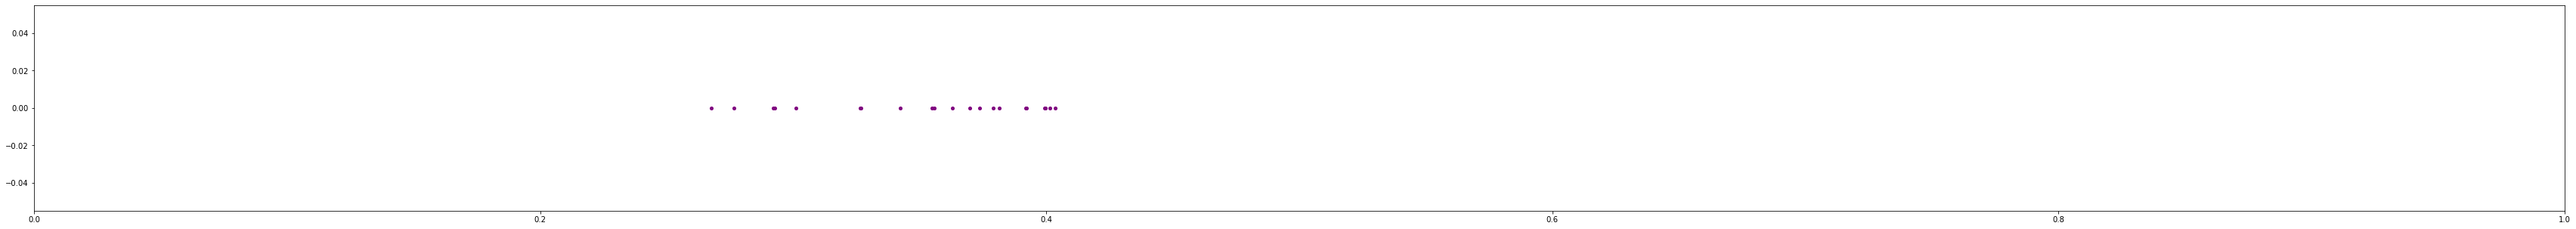

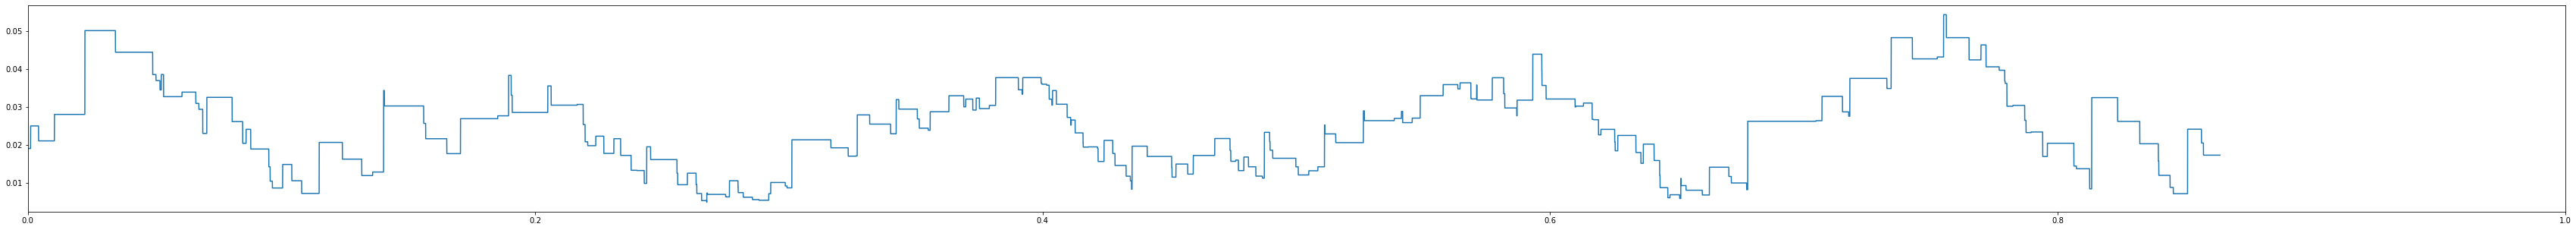

noise: [-1.14431299e-03 -3.12498046e-03 -6.05395019e-04  1.15244213e-03
  5.36964987e-05 -1.94134472e-04 -3.93217798e-04 -1.67563475e-03
 -6.06107939e-04 -1.45287397e-03]
noise (bases): [ -545.61758853 -1490.01568337  -288.65718839   549.49362919
    25.60292018   -92.56486932  -187.48939179  -798.95605437
  -288.99711432  -692.74193051]
full fragment length: 134
partial fragment length: 10
matched indices: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]
partial fragment indices: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
matching_ratio: 0.9444444444444444


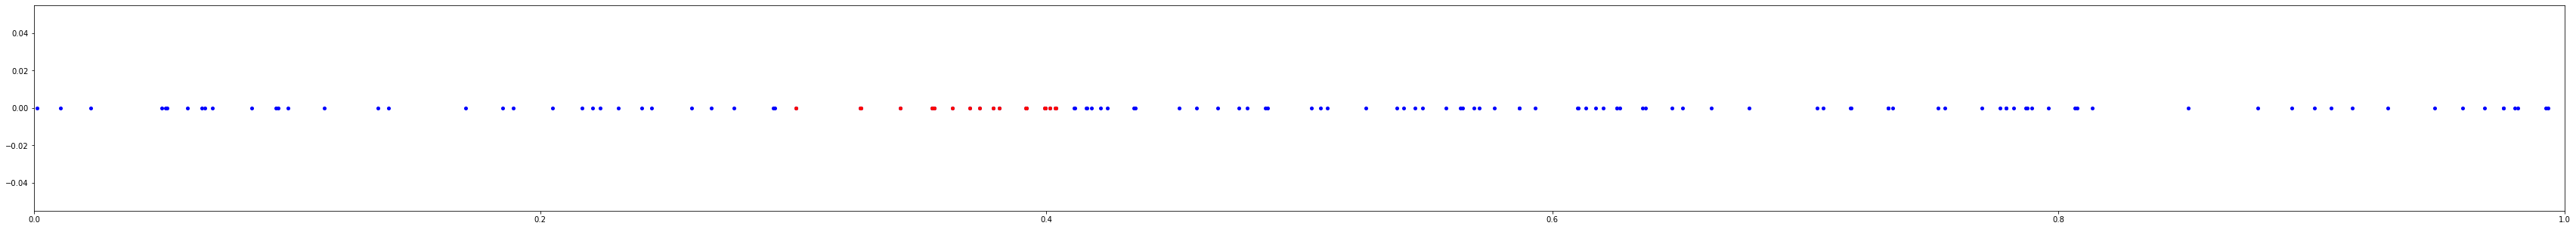

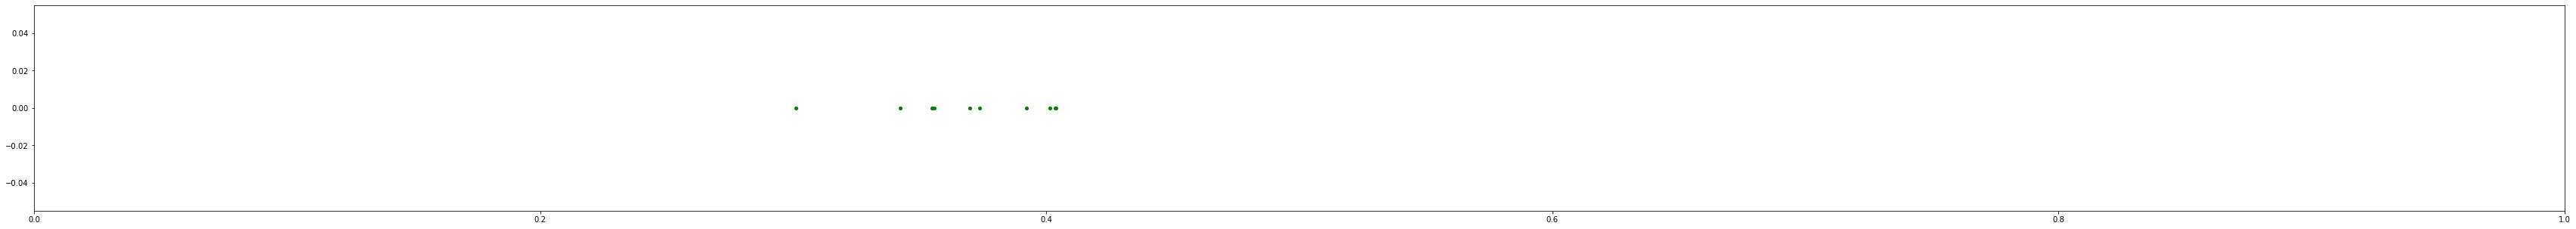

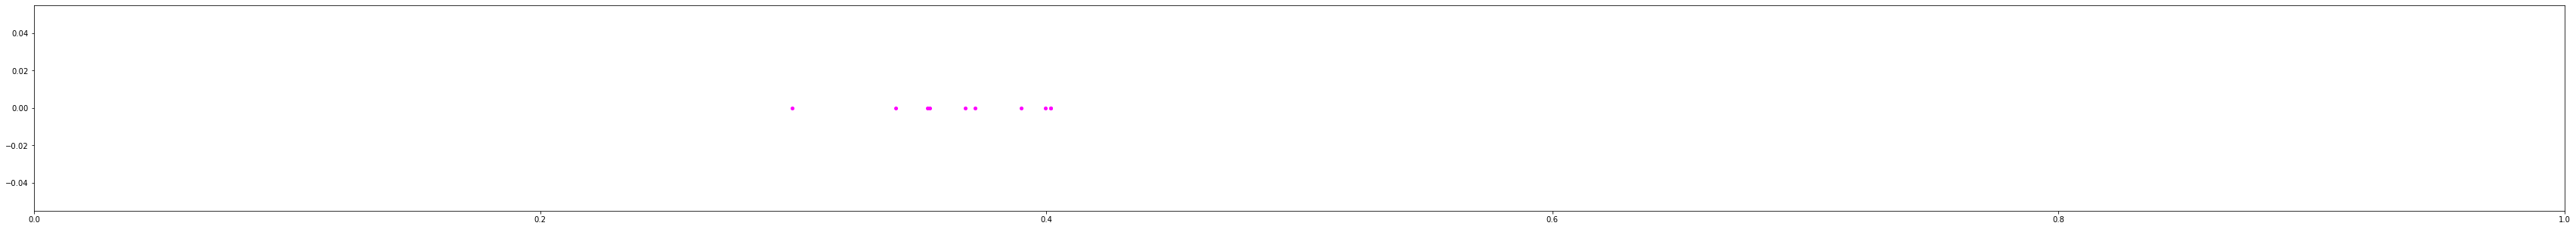

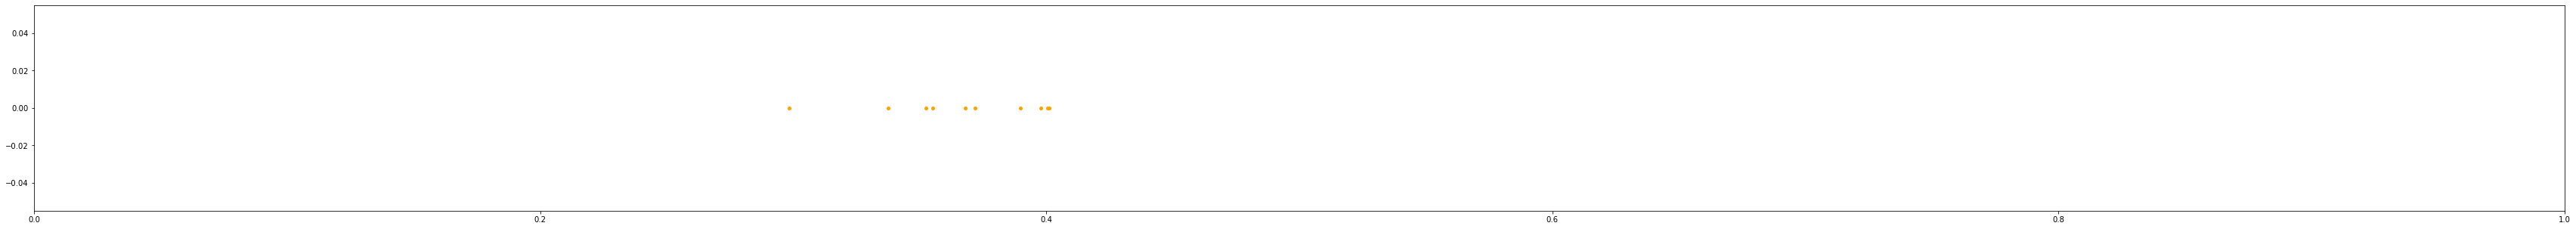

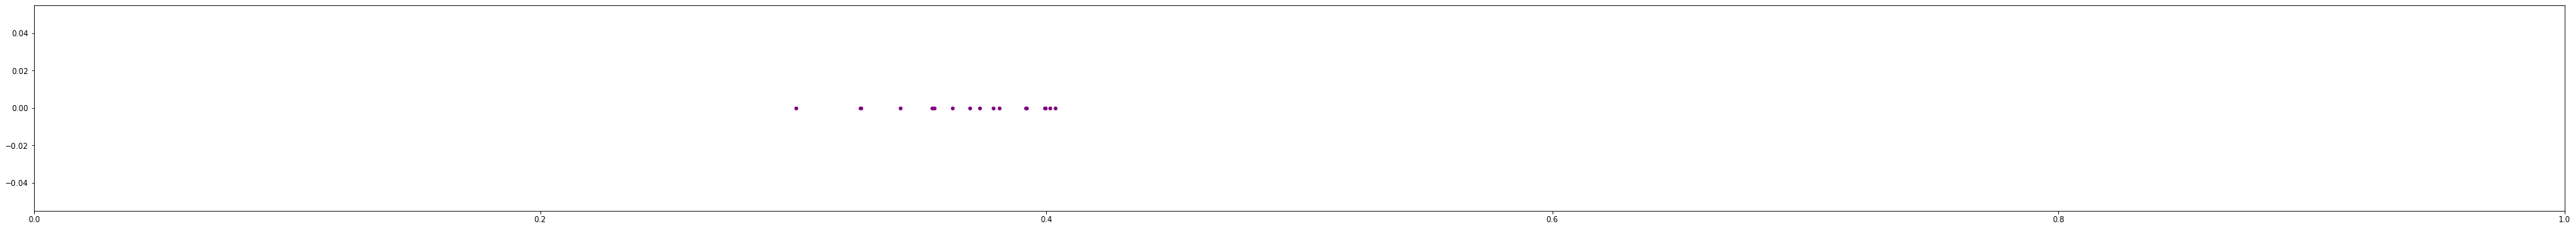

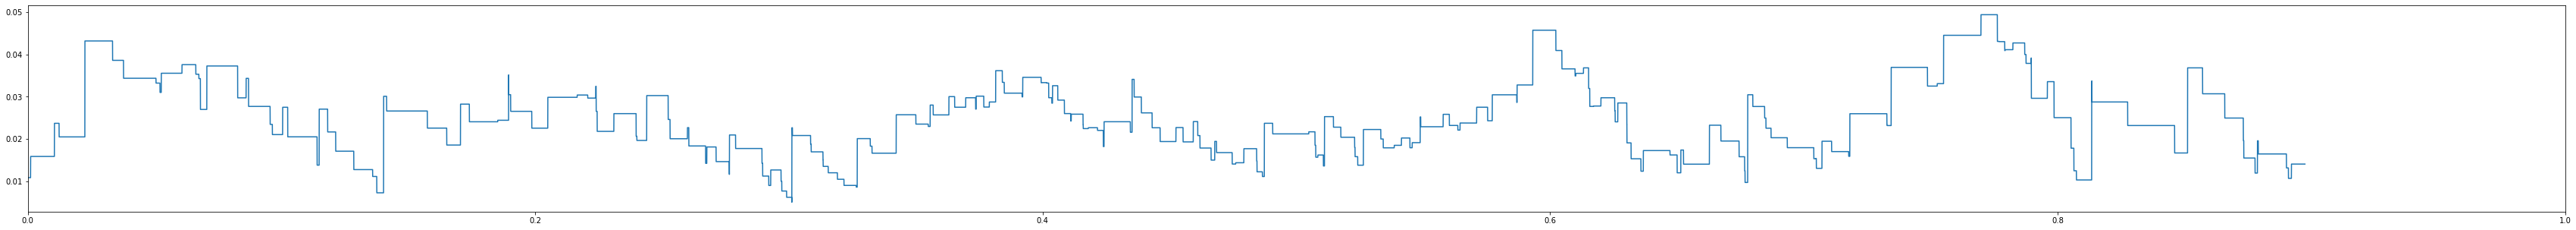

noise: [ 8.66896577e-04  5.58715992e-04 -6.77522596e-04  4.15838604e-05
 -7.18747328e-04  1.62658952e-03  3.24122066e-06  1.22564665e-04
 -1.68027069e-03  8.06419032e-04]
noise (bases): [ 413.34322316  266.40025476 -323.04819413   19.82751729 -342.70447585
  775.57089725    1.54543994   58.43981269 -801.16650837  384.50704604]
full fragment length: 134
partial fragment length: 10
matched indices: [77 78 79 80 81 82 83 84 85 86 87 88 89 90]
partial fragment indices: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52]
matching_ratio: 0.0


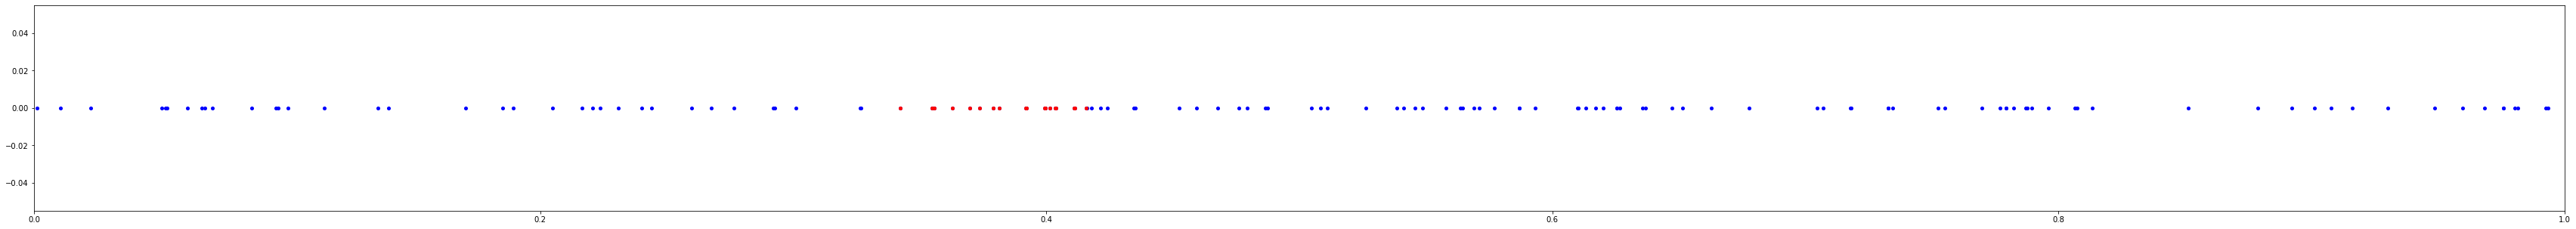

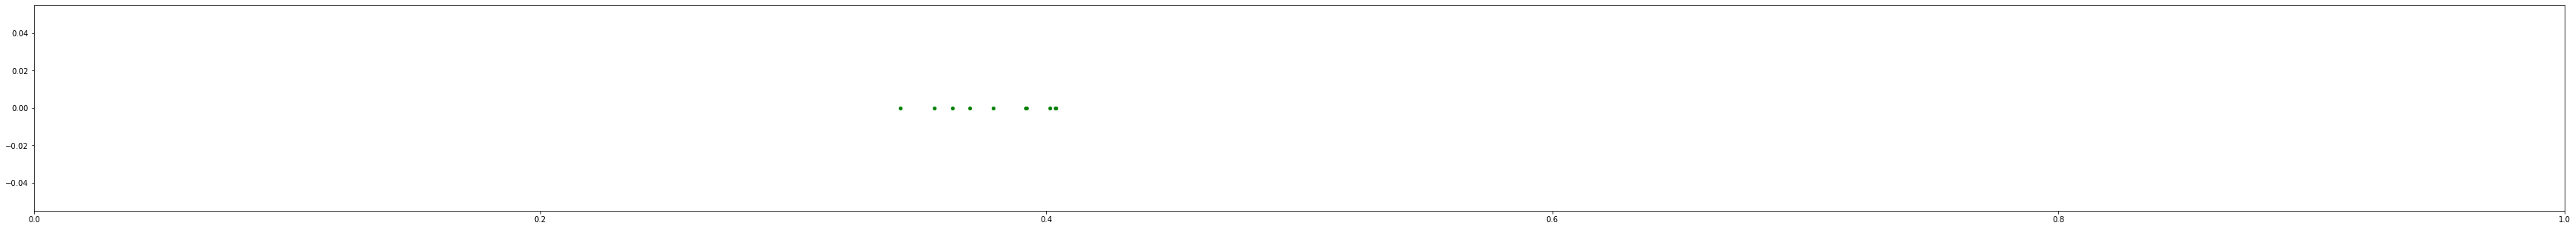

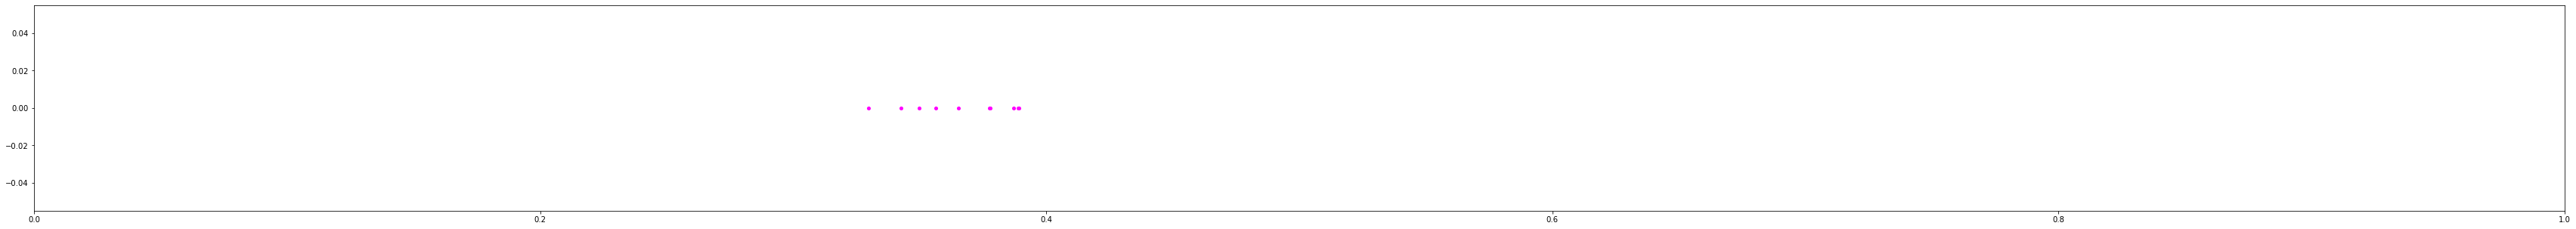

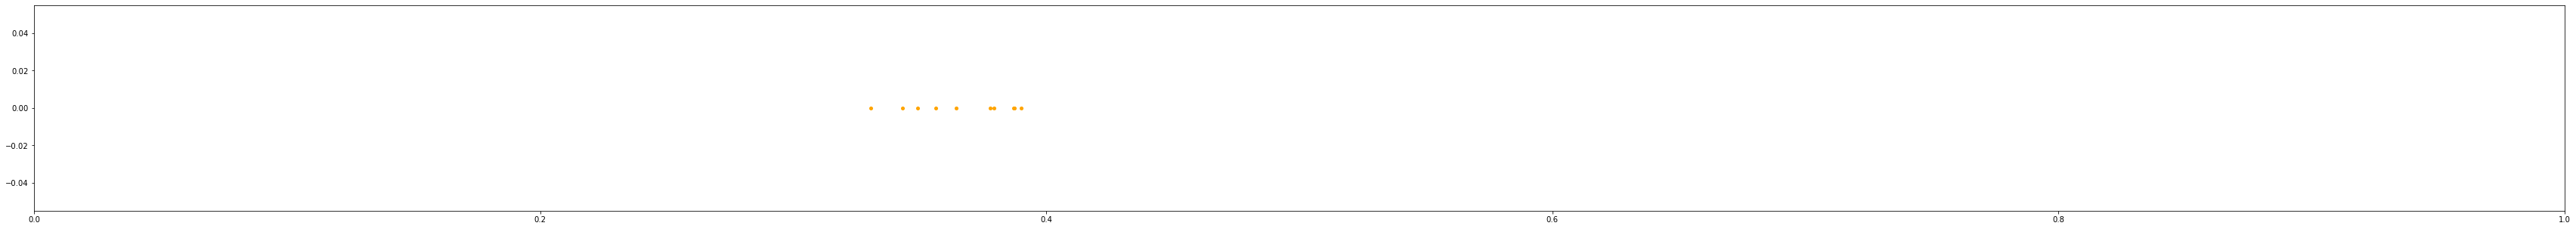

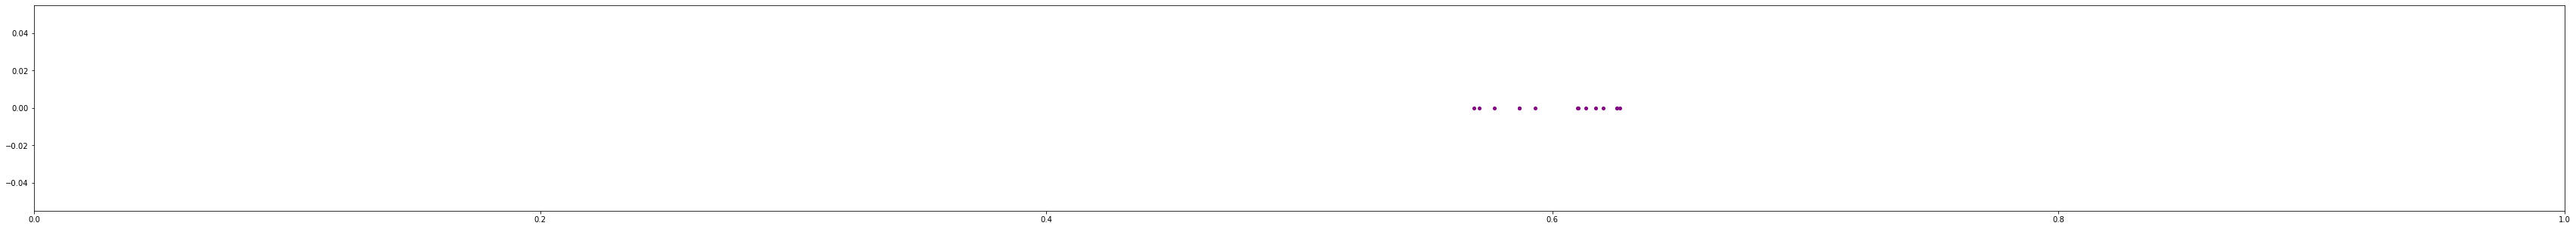

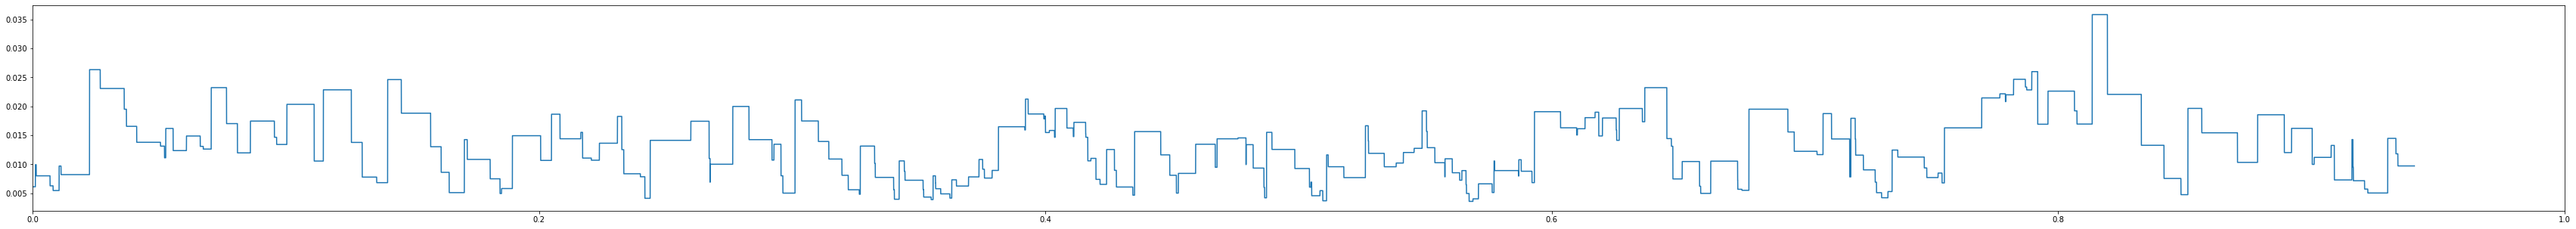

noise: [-2.31074913e-05 -5.62396587e-04 -1.50327274e-03 -3.06033973e-04
  4.76855321e-04  1.43227718e-03 -9.95323331e-04 -5.44637297e-04
 -1.60365136e-03  5.48575265e-04]
noise (bases): [ -11.0178367  -268.15519205 -716.77246848 -145.91944638  227.36843207
  682.92121957 -474.57812693 -259.68742012 -764.63379738  261.565075  ]
full fragment length: 134
partial fragment length: 10
matched indices: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
partial fragment indices: [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
matching_ratio: 0.8888888888888888


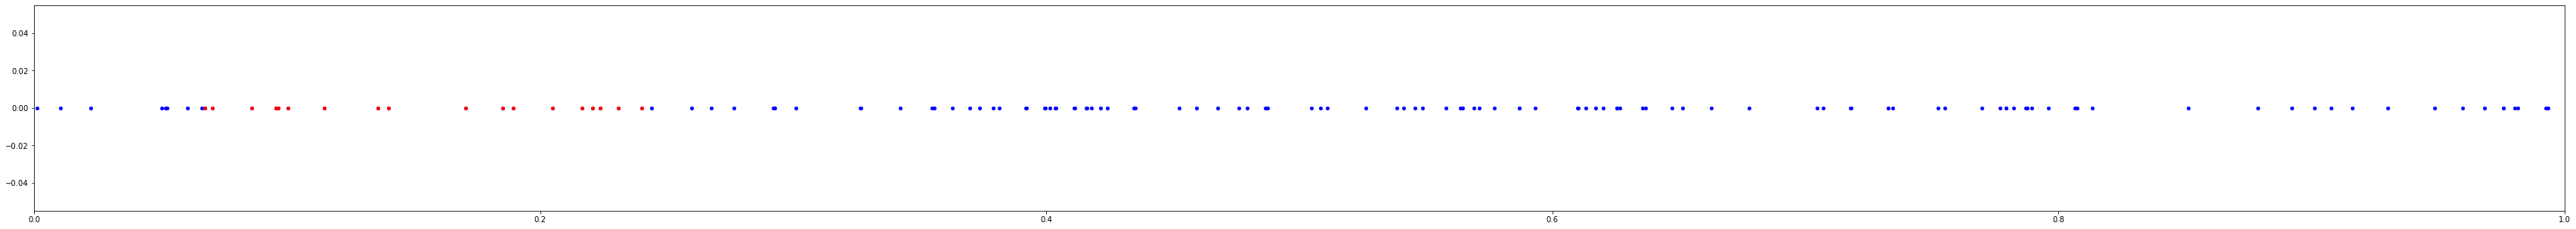

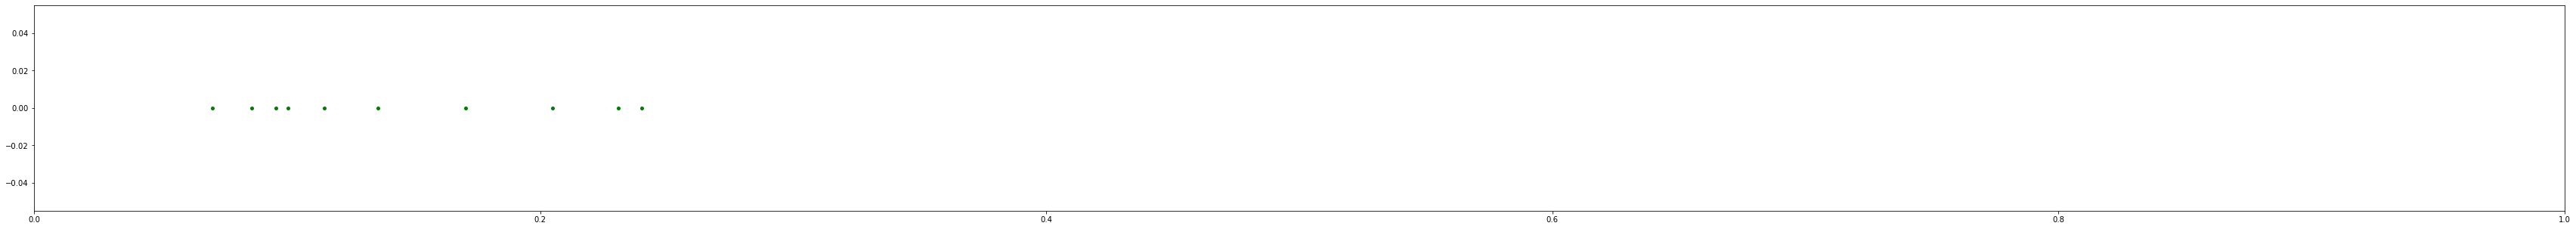

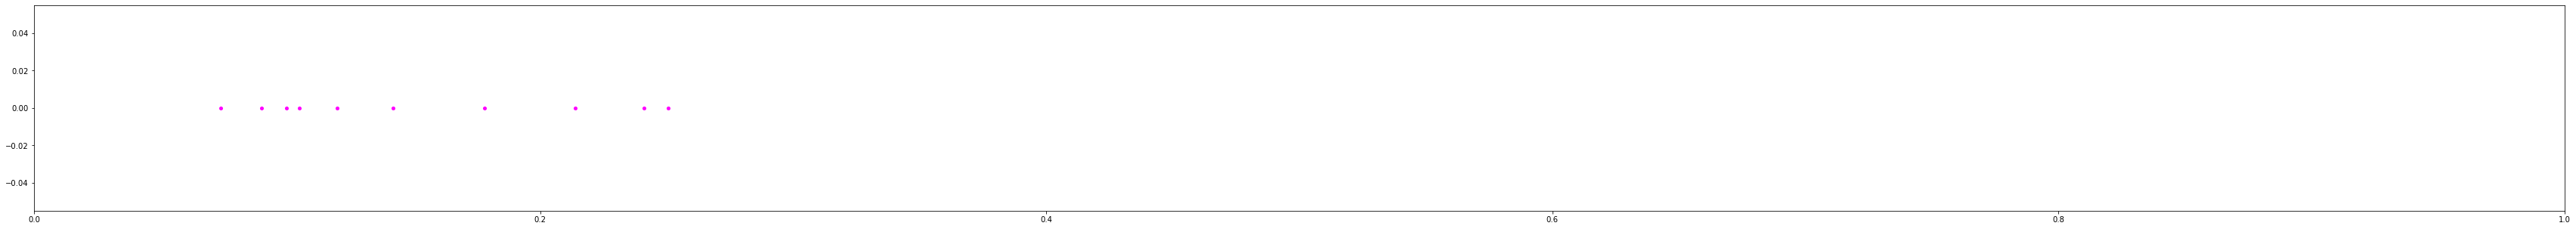

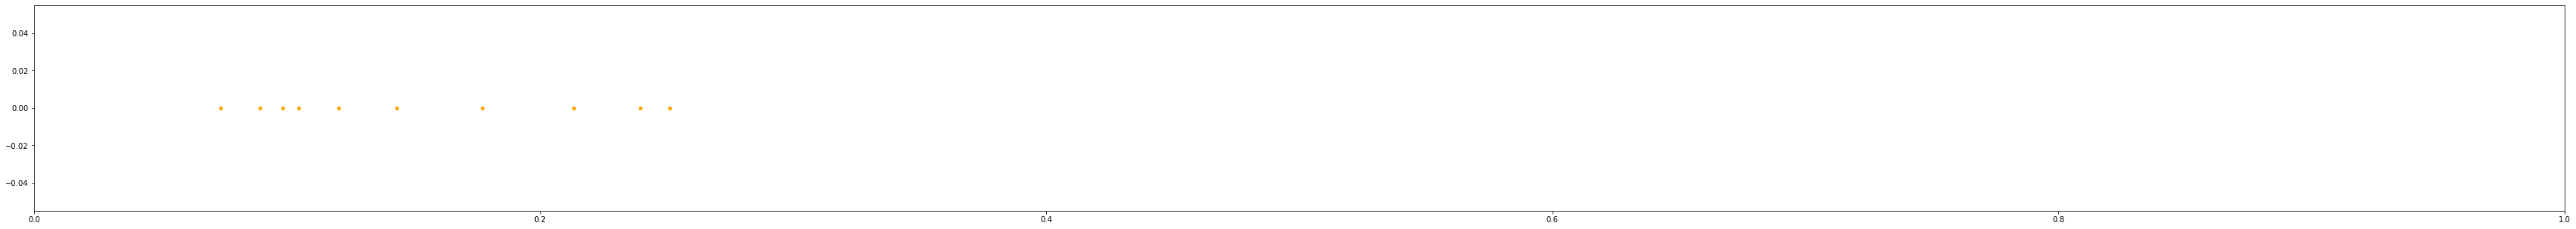

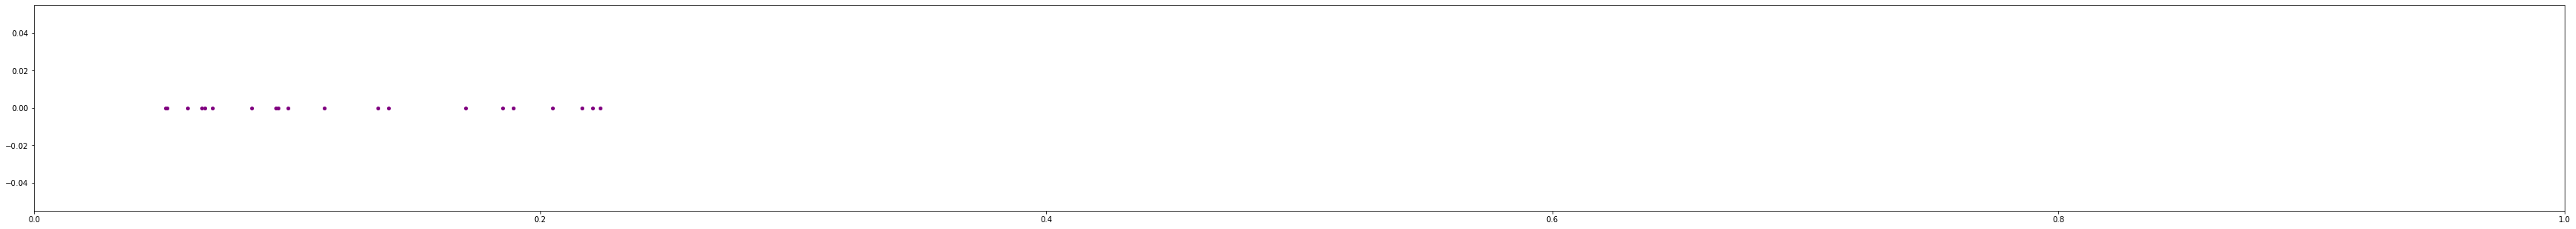

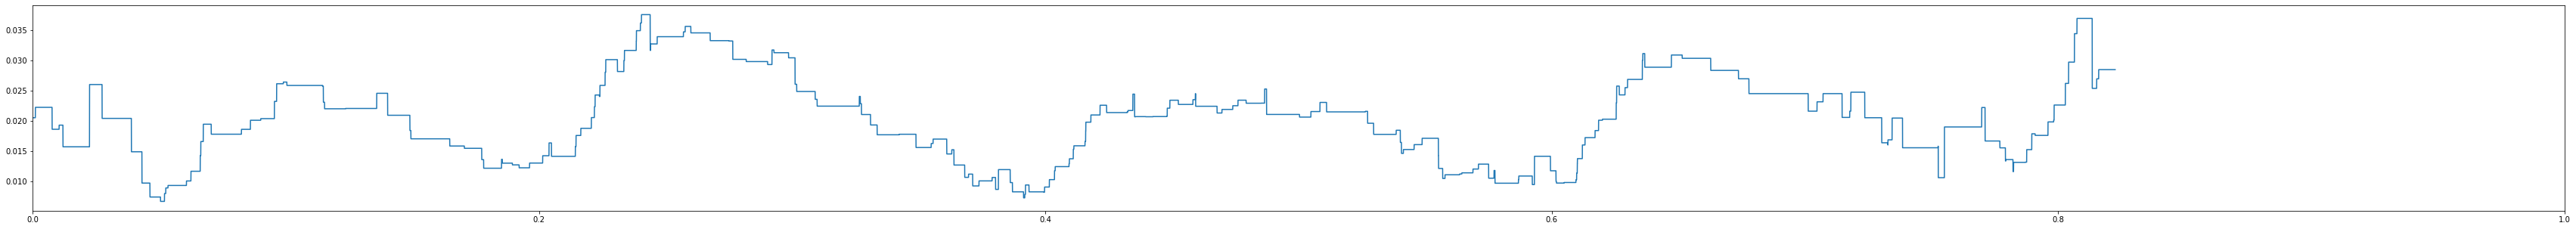

noise: [-5.76663824e-04 -6.68903738e-04 -2.88083215e-04 -8.68809266e-04
 -5.58746430e-04 -6.33725818e-05  3.84851750e-04 -4.41185788e-05
 -8.62474398e-04  1.74553327e-03]
noise (bases): [-274.95792462 -318.93865349 -137.36038174 -414.25520833 -266.41476779
  -30.21655397  183.500393    -21.03609134 -411.2346929   832.2842277 ]
full fragment length: 134
partial fragment length: 10
matched indices: [71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
partial fragment indices: [71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]
matching_ratio: 0.8333333333333334


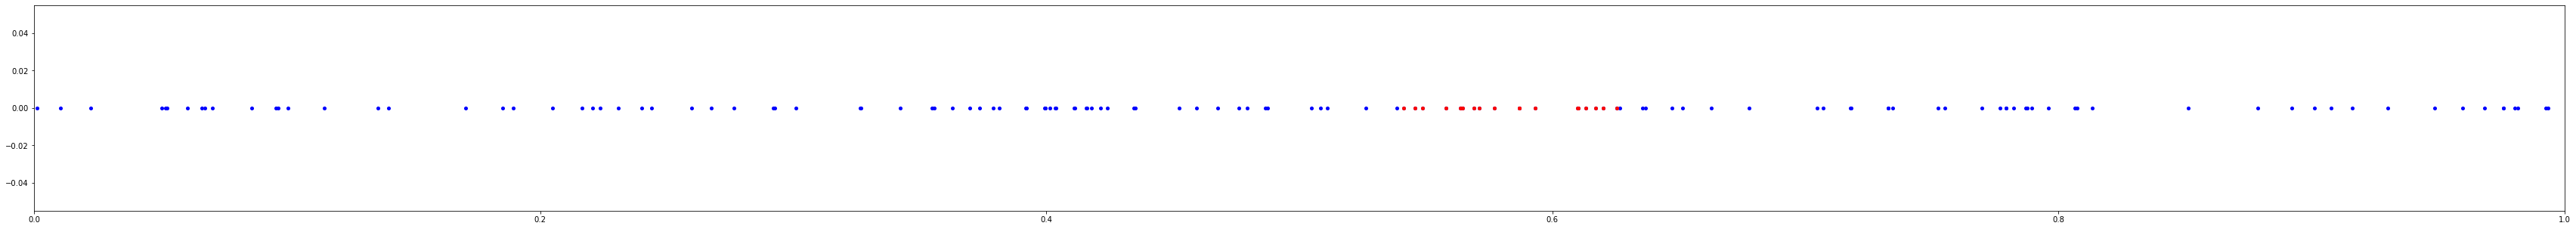

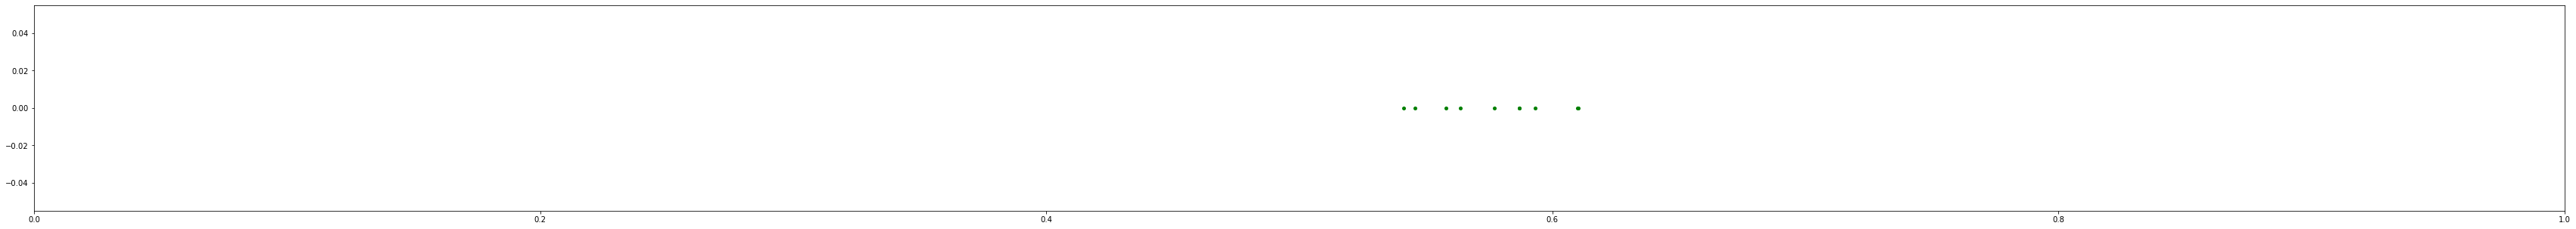

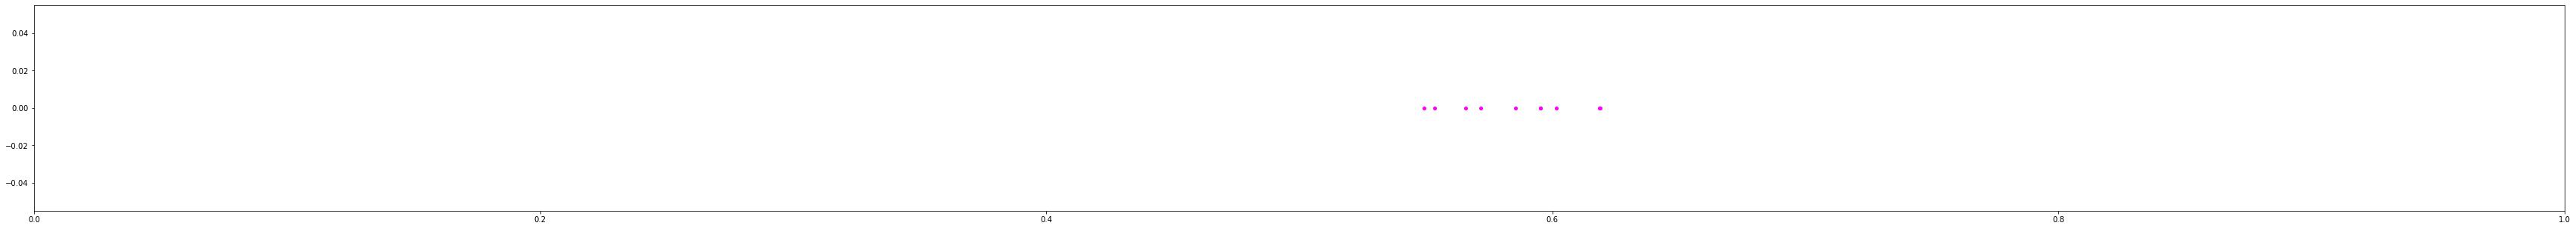

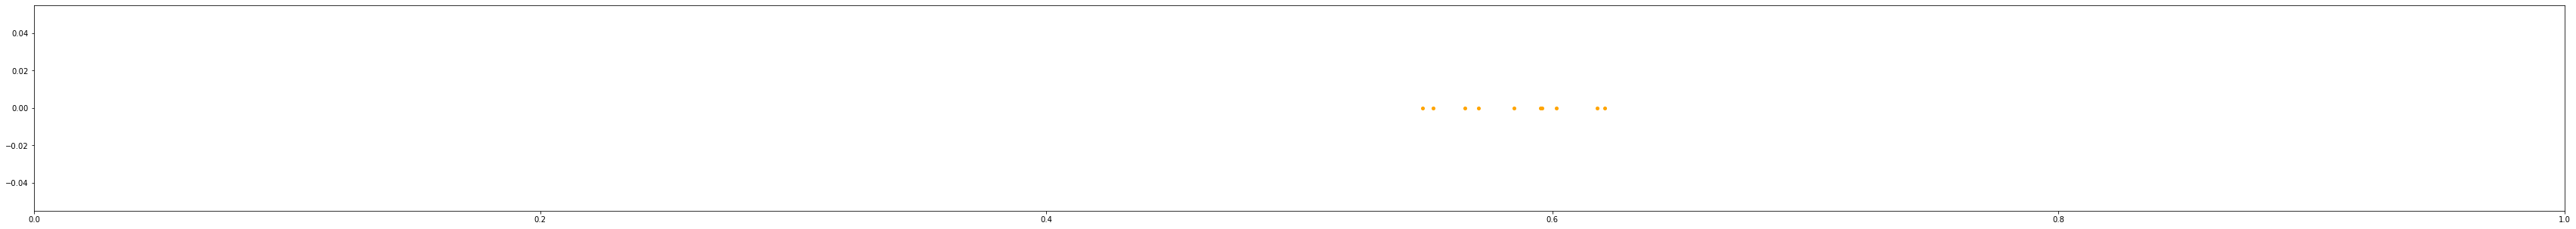

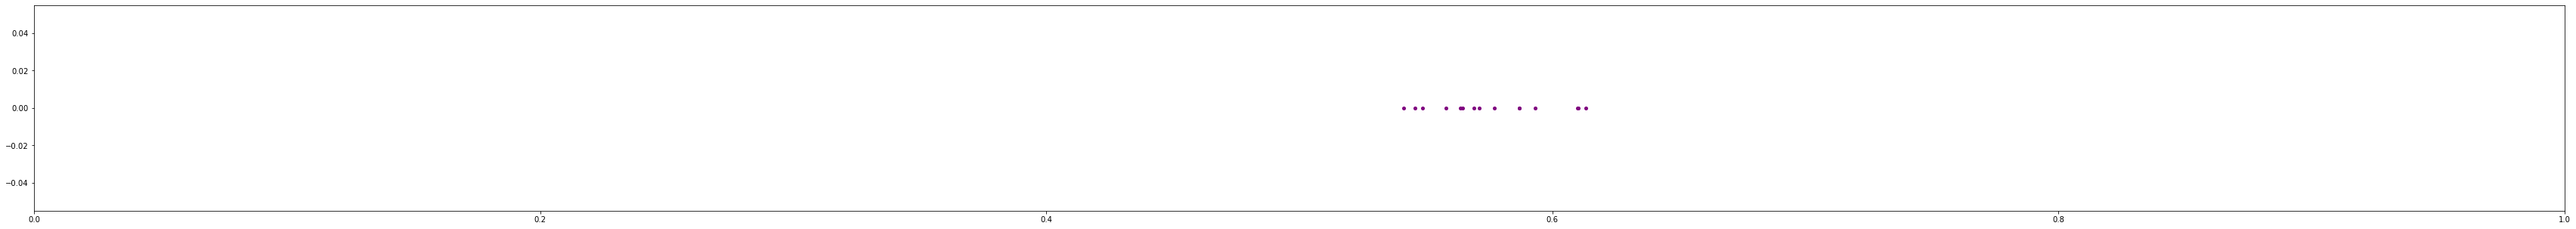

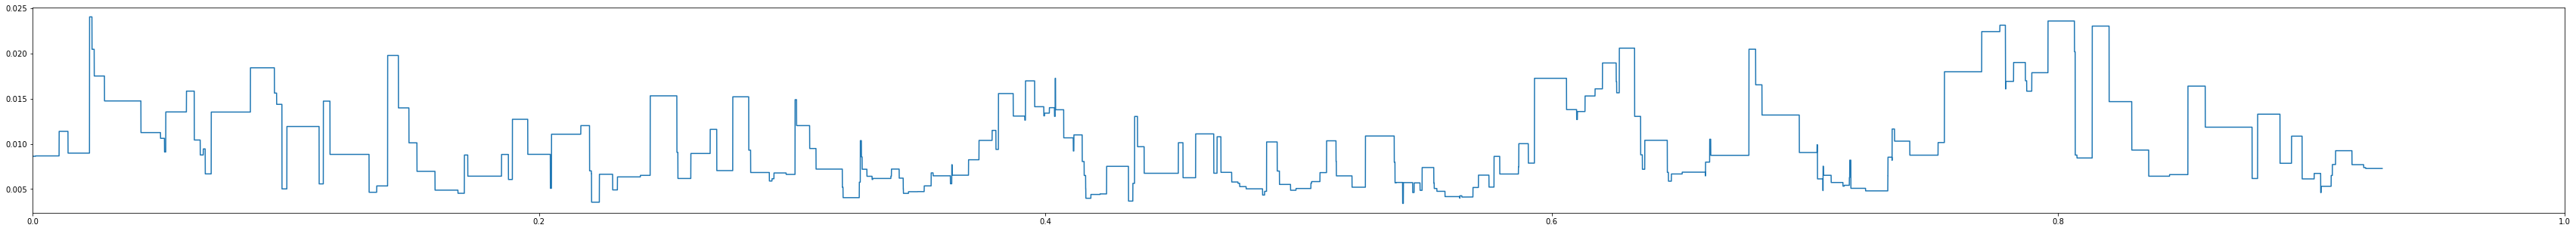

noise: [-3.15148460e-04  7.90714815e-04 -7.07612801e-04 -4.31377545e-04
  6.92536309e-04 -2.03189091e-03  1.18190436e-03 -8.89464130e-06
  2.72318101e-04  8.64255519e-04]
noise (bases): [-150.26530672  377.01914957 -337.39544452 -205.68426424  330.20685245
 -968.82184177  563.54145496   -4.24103613  129.84344919  412.08394561]
full fragment length: 134
partial fragment length: 10
matched indices: [108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126]
partial fragment indices: [110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
matching_ratio: 0.9444444444444444


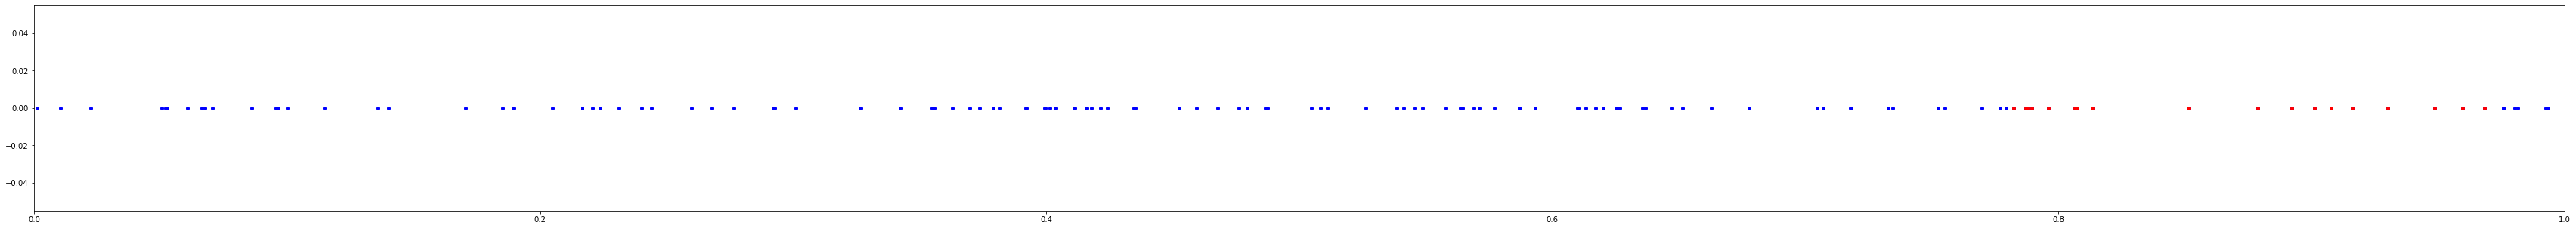

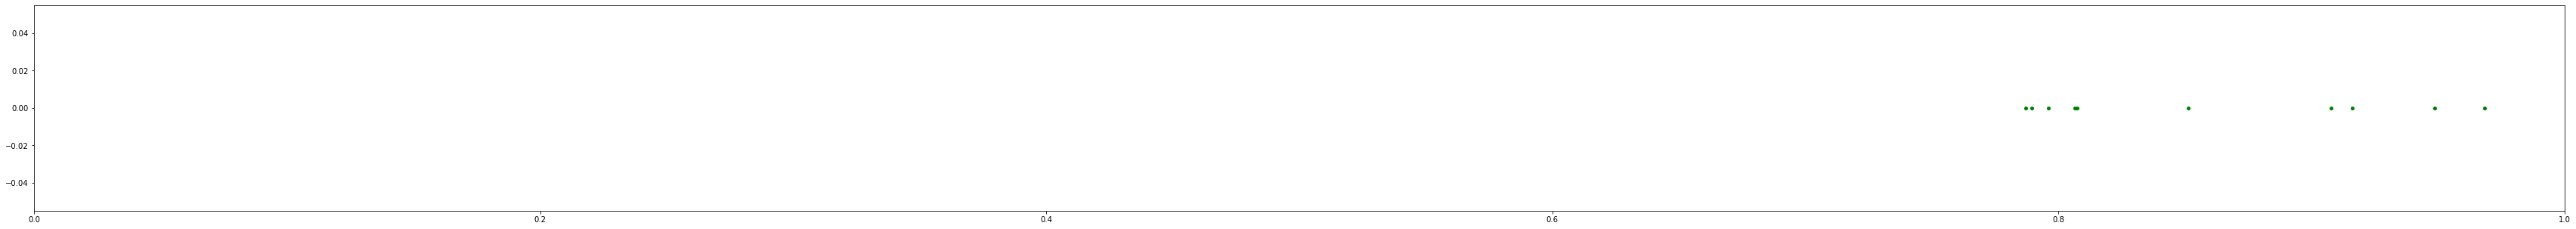

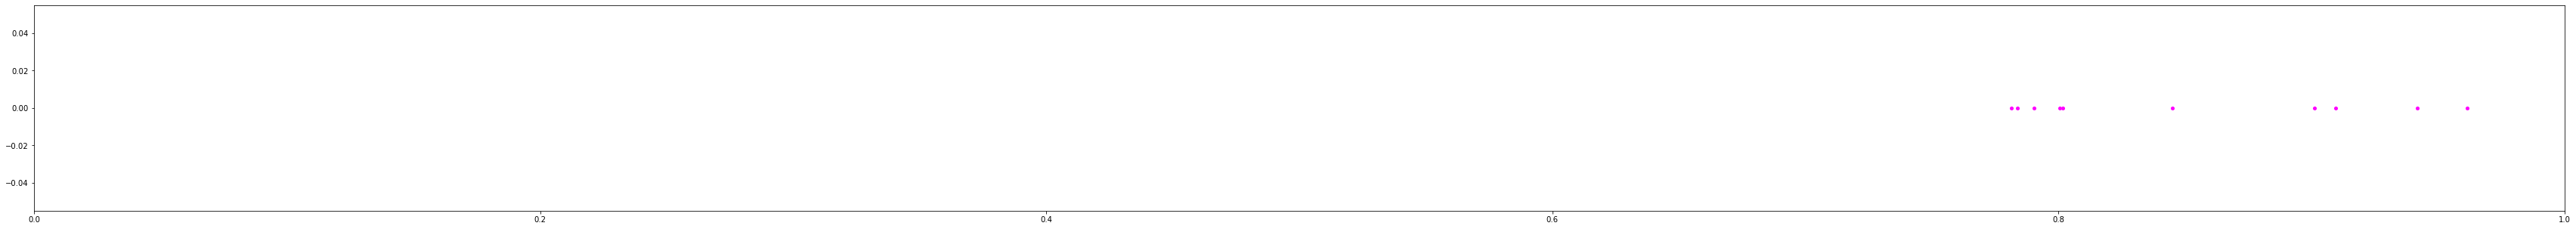

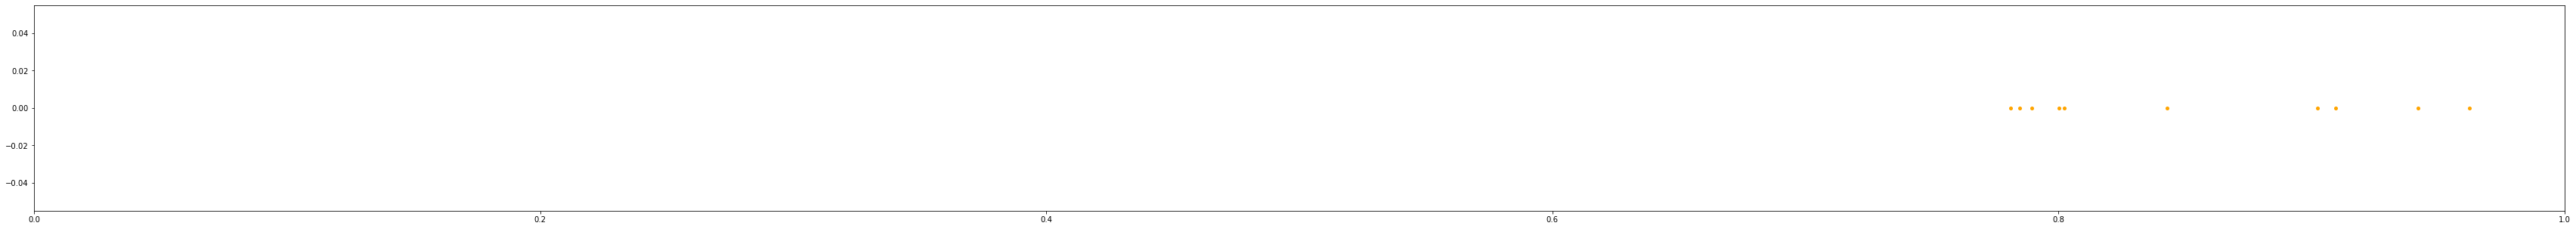

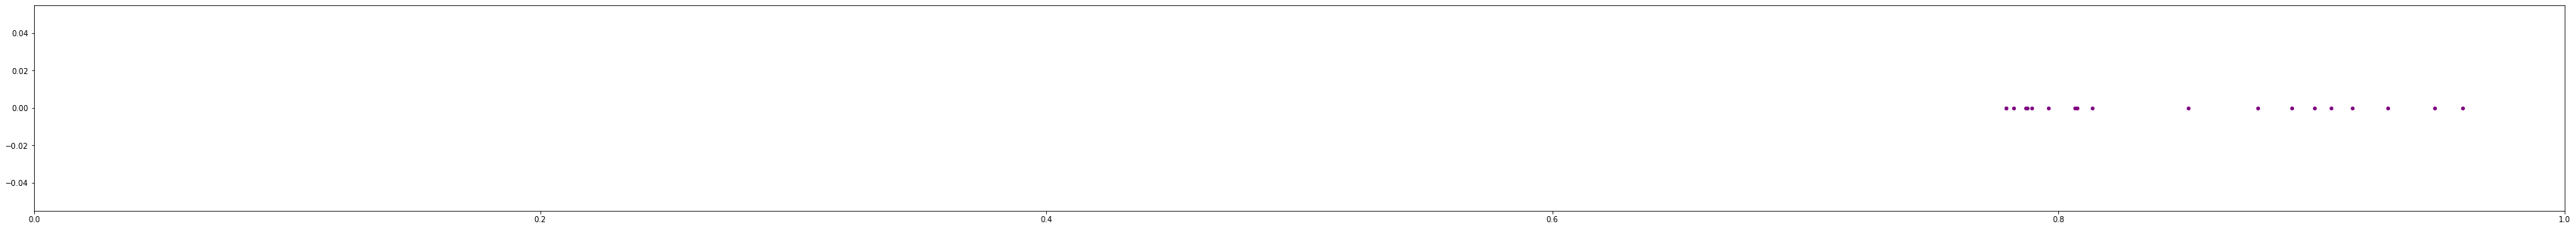

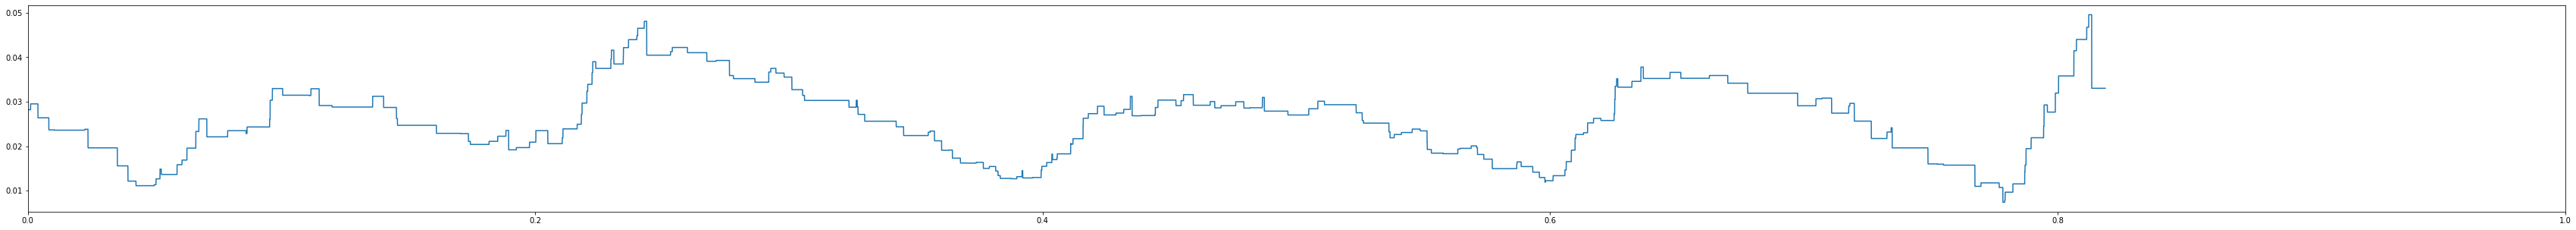

noise: [ 0.00122352 -0.0008917   0.00045914 -0.00120939 -0.00098572 -0.00141273
  0.00138658  0.00117973 -0.00100081 -0.00117908]
noise (bases): [ 583.38338271 -425.17133439  218.92129271 -576.64748049 -469.99721211
 -673.60048603  661.13236714  562.50696382 -477.19520115 -562.19571764]
full fragment length: 134
partial fragment length: 10
matched indices: [10 11 12 13 14 15 16 17 18 19]
partial fragment indices: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
matching_ratio: 0.0


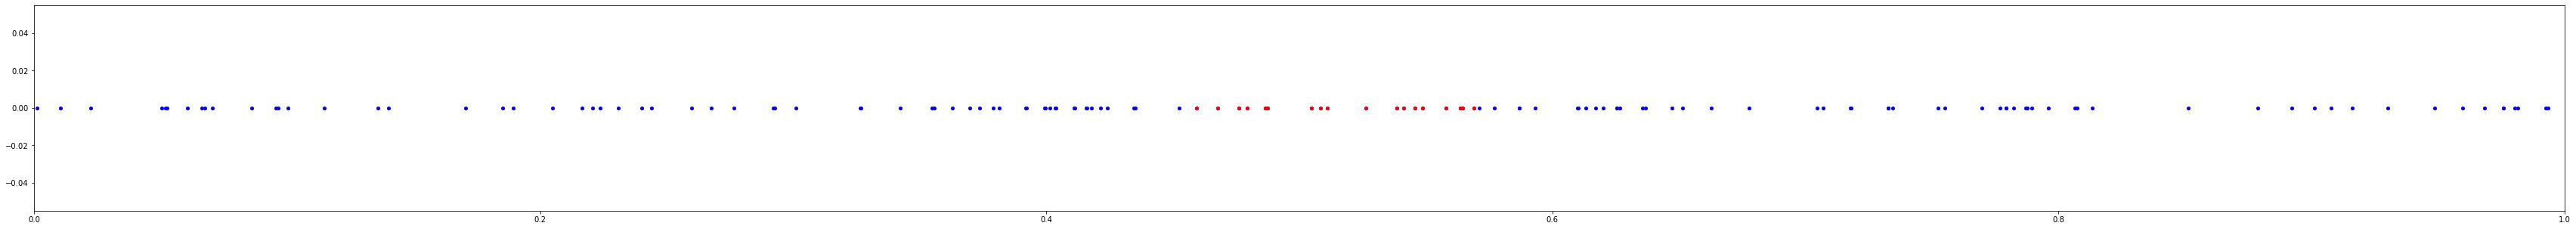

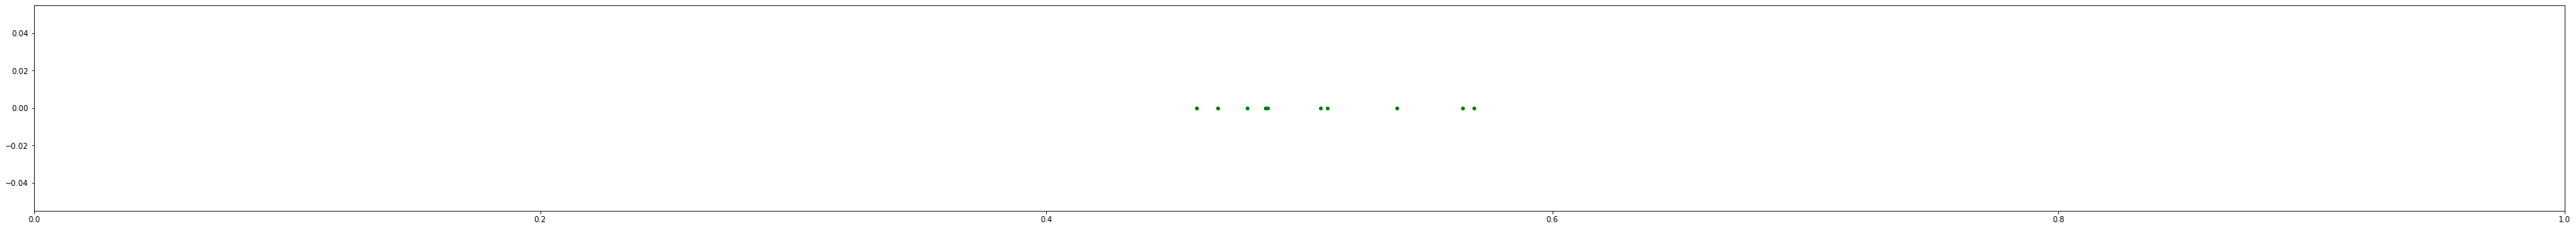

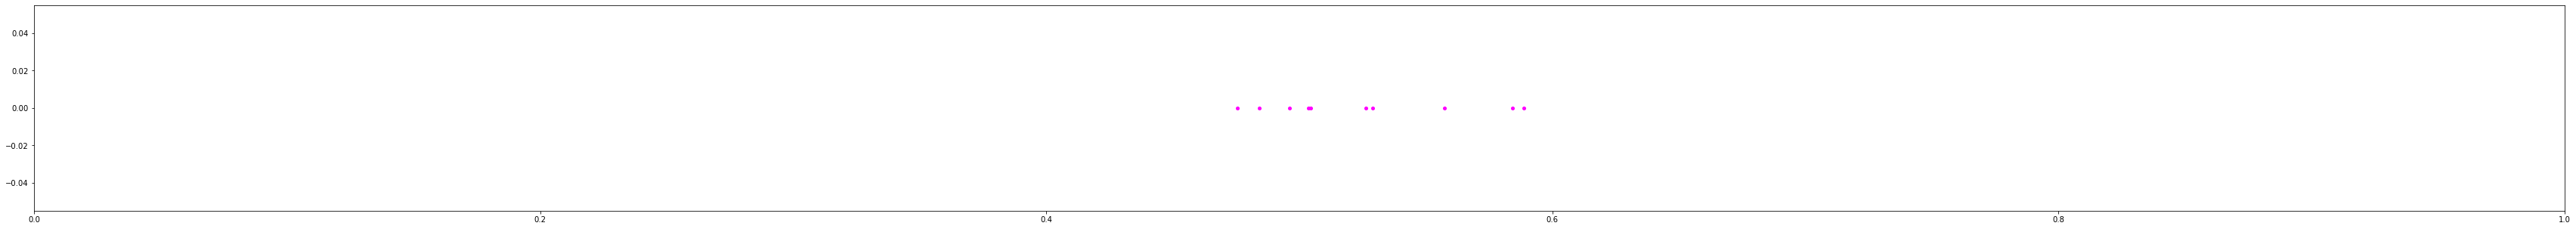

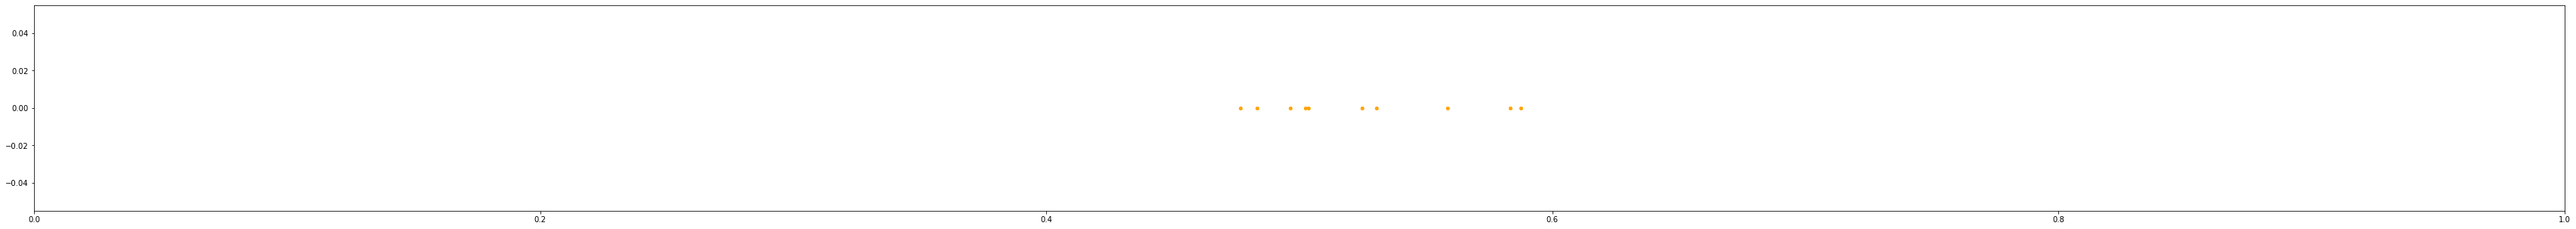

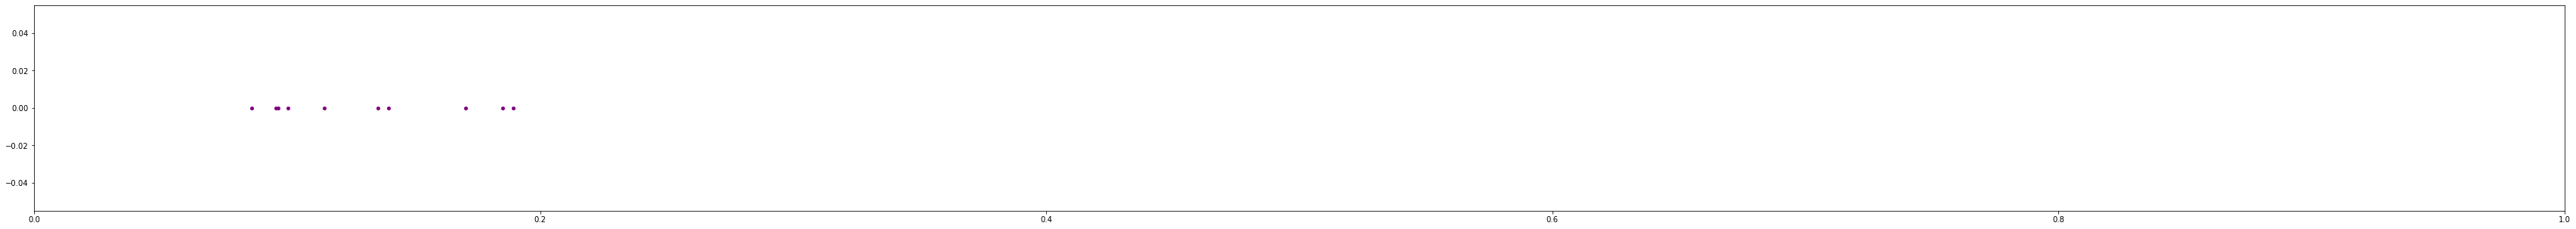

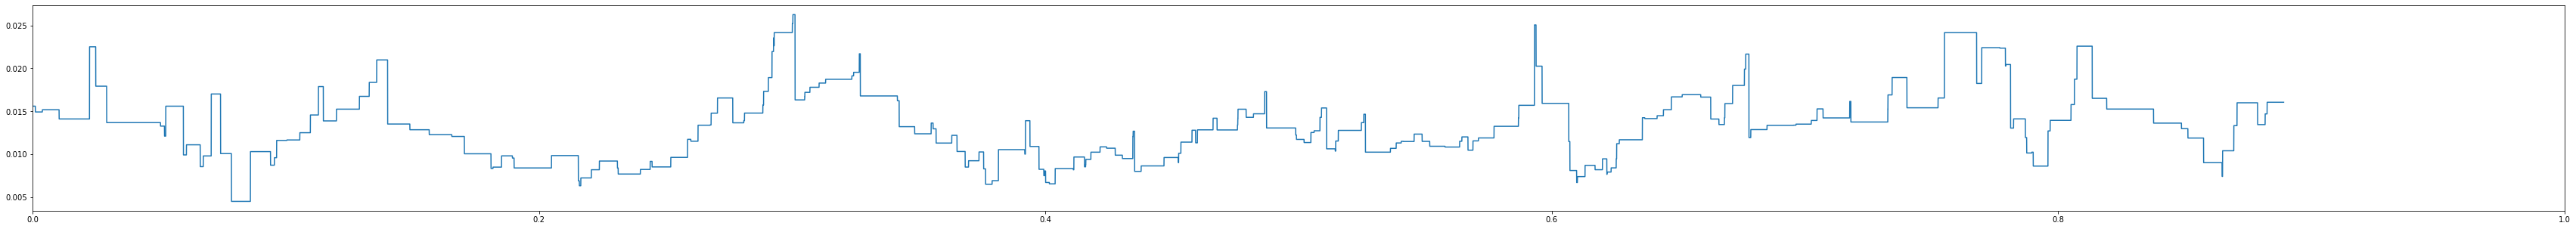

In [12]:
    filename = os.path.normpath("C:/genome/GCA_000001405.29_GRCh38.p14_genomic.fna")
    seq_dict = {rec.id: rec for rec in Bio.SeqIO.parse(filename, "fasta")}
    chromosome4 = seq_dict['CM000666.2']
    chromosome4_segment = chromosome4[88227200:88704008]
    chromosome4_segment_len = len(chromosome4_segment.seq)
    print(f'chromosome4_segment length: {chromosome4_segment_len}')
    full_fragment_indices, full_fragment = dye_chromosome(chromosome=chromosome4_segment, fluorochrome='CTTAAG')

    # size = 100
    # rng = default_rng(seed=0)
    # full_fragment = rng.uniform(size=size)
    # full_fragment.sort()

    # partial_fragment_indices = get_subfragment_indices_by_length(fragment=full_fragment, subfragment_min_length=0.1)

    experiments_count = 10
    for i in range(experiments_count):
        display(HTML(f'<h1>========= Experiment {i} =========</h1>'))
        # print(f'========= Experiment {i} =========')

        partial_fragment_indices = get_subfragment_indices_by_count(fragment=full_fragment, subfragment_indices_count=16)
        partial_fragment = full_fragment[partial_fragment_indices]

        sampling_factor = 0.6
        sampled_partial_fragment_size = int(partial_fragment_indices.shape[0] * sampling_factor)
        sampled_partial_fragment_meta_indices = numpy.random.choice(partial_fragment_indices.shape[0], sampled_partial_fragment_size, replace=False)
        sampled_partial_fragment_meta_indices.sort()

        sampled_partial_fragment_indices = partial_fragment_indices[sampled_partial_fragment_meta_indices]
        sampled_partial_fragment = full_fragment[sampled_partial_fragment_indices]
        sampled_partial_fragment.sort()

        min_scale = 0.95
        max_scale = 1.05
        scale = (max_scale - min_scale) * numpy.random.random(1) + min_scale

        mu, sigma = 0, 0.001
        # transformed_sampled_partial_fragment = scale * (sampled_partial_fragment - sampled_partial_fragment[0])
        transformed_sampled_partial_fragment = scale * sampled_partial_fragment
        # transformed_sampled_partial_fragment = transformed_sampled_partial_fragment - transformed_sampled_partial_fragment[0]
        noise = numpy.random.normal(mu, sigma, transformed_sampled_partial_fragment.shape[0])
        print(f'noise: {noise}')
        print(f'noise (bases): {noise * chromosome4_segment_len}')

        transformed_noised_sampled_partial_fragment = transformed_sampled_partial_fragment + noise
        # transformed_noised_sampled_partial_fragment = transformed_noised_sampled_partial_fragment - transformed_noised_sampled_partial_fragment[0]

        print(f'full fragment length: {full_fragment.shape[0]}')
        print(f'partial fragment length: {transformed_sampled_partial_fragment.shape[0]}')

        matched_indices, x_dist, y_dist = match_fragments(full_fragment=full_fragment, partial_fragment=transformed_noised_sampled_partial_fragment)
        matched_fragment = full_fragment[matched_indices]

        print(f'matched indices: {matched_indices}')
        print(f'partial fragment indices: {partial_fragment_indices}')

        indices_diff = len(list(set(partial_fragment_indices) - set(matched_indices)))
        indices_count = len(list(partial_fragment_indices))
        if indices_diff > indices_count:
            print(f'matching_ratio: FAILED')
        else:
            matching_ratio = 1 - (indices_diff / indices_count)
            print(f'matching_ratio: {matching_ratio}')

        plot_fragments(
            full_fragment=full_fragment,
            partial_fragment=partial_fragment,
            sampled_partial_fragment=sampled_partial_fragment,
            transformed_sampled_partial_fragment=transformed_sampled_partial_fragment,
            transformed_noised_sampled_partial_fragment=transformed_noised_sampled_partial_fragment,
            matched_fragment=matched_fragment,
            x_dist=x_dist,
            y_dist=y_dist)